- *```Author:```* ```Adeyemi Adedoyin Simeon```        
- *```Date:```* ```April 27, 2023```

# MOLD DETECTION USING ROBOFLOW WITH YOLOv8


### Proposed Implementation Steps

* Dataset Preparation (Roboflow)
* Image Dataset Preprocessing (Roboflow)
* Installing YOLOv8 package and dependencies
* Load our custom dataset from Roboflow in YOLOv8 format (475 annotated mold images) splitted into (70%:20%:10% ratio making 329:93:53 images as training:validation:test sets respectively; after augmentation, we have 87%:8%:5% making 987:93:53 Training:validation:test sets respectively)
* Run YOLOv8 training (on the 329 annonated training images set augumented to 657 images for training) and validated on 93 annotated validation images set)
* Evaluate YOLOv8 model performance on our dataset
* Run YOLOv8 inference on the test images (constituting 53 images test set)


# Roboflow
We prepared (Annotated) and Preprocessed our images dataset using [Roboflow](https://app.roboflow.com/). A tool for developers to prepare, annonate preprocess datasets and build computer vision models.

### 1. Dataset Preparation using Roboflow
- Loading our raw mold dataset (images) into Roboflow for preparation
- Annotating the loaded datasets (Annotation class is "mold" object).
- Generating a version of our dataset in Roboflow
-

### 2. Data Preprocessing Steps taken using Roboflow
- Automatic Orientation (To allow for better generalization)
- Image Resizing (We resized all images into 640 x 640, the expected image input_size by Yolov8 models)
- Data Augmentation (This step was taken to increase the number of training images and also to create variations in image position, quality, posture, etc in order to be able to generalize better when given out of sample data that may appear in various forms. The following aumentation steps were performed
  - ```Rotation```: Added variability (-15° and +15°) to image position to help model be more resilient to rotational variations in images.
  - ```Saturation``: Varying image color saturation level (quality) by (-25%; to +25%) of the training images set.
  - ```Exposure```: Added variability (-25%; to +25%) to image brightness to help model be more resilient to lighting and camera setting changes.

  **Summary of Augmentations Steps performed**
  - Rotation: Between -15° and +15°
  - Saturation: Between -25% and +25%
  - Exposure: Between -25% and +25%

- **Finally we specified that a the original images for training (329 images) be tripled (x3), by augumenting them with additional images satisfying the augumentation steps to increase the number of images available to learn from. The result of which produced 987 images available as training set.**

# Connecting to Google Drive

In [ ]:
# Connecting Google Colab to Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
HOME = "gdrive/MyDrive/Colab Notebooks/Olubukola_Mold_Detection_Project"
PWD = f'{HOME}/yolov8'
DATASET_PATH = f'datasets/mold-detection-project-2'

In [ ]:
pwd

'/content'

# Importing General Packages


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Image display libs
import glob
from IPython import display
display.clear_output()

from IPython.display import Image, display

%matplotlib inline

## Checking if we have access to GPU

We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Thu Apr 20 12:15:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Changing current working directory
%cd {PWD}

/content/gdrive/MyDrive/Colab Notebooks/Olubukola_Mold_Detection_Project/yolov8


## Installing YOLOv8 Package and Dependencies through ```ultralytics==8.0.20```

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

# YOLO Package
import ultralytics
ultralytics.checks()

# YOLOv8 Package
from ultralytics import YOLO

# Image display libs
import glob
from IPython.display import Image, display

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/107.7 GB disk)


## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

# LOADING DATASETS FROM ROBOFLOW

## Loading the annotated Datasets into Working directory from Roboflow

In [ ]:
pwd

'/content/gdrive/MyDrive/Colab Notebooks/Olubukola_Mold_Detection_Project/yolov8'

In [ ]:
%cd datasets

/content/gdrive/MyDrive/Colab Notebooks/Olubukola_Mold_Detection_Project/yolov8/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="P8tLBcntmsqV7R3bwvnD")
project = rf.workspace("university-of-salford-d3dwy").project("mold-detection-project")
dataset = project.version(2).download("yolov8")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached roboflow-1.0.5-py3-none-any.whl (56 kB)
  Using cached wget-3.2.zip (10 kB)
  Preparing metadata (setup.py) ... done
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached requests_toolbelt-0.10.1-py2.py3-none-any.whl (54 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=a28bc455de5c1367ed8a642b1a379b5a5cb3992a38b974863179de2447c1bea9
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to mold-detection-project-2 in yolov8:: 100%|██████████| 2278/2278 [00:17<00:00, 130.53it/s]


In [ ]:
%cd ../

/content/gdrive/MyDrive/Colab Notebooks/Olubukola_Mold_Detection_Project/yolov8


## Sample of Loaded Datasets

In [ ]:
def show_dataset_images(img_path='datasets', start=0, size=10, randomize=False):
  i = start
  limit = i + size # max images to print

  if randomize:
    images = np.random.choice(glob.glob(f'{img_path}/*.jpg'), size=size, replace=False) #assuming JPG
  else:
    images = glob.glob(f'{img_path}/*.jpg')[i:limit] #assuming JPG

  counter = 1
  rows = (size // 4) + 1
  cols = 4

  plt.figure(figsize=(8,8))
  for imageName in images:
      if i < limit:
        plt.subplot(rows, cols, counter)
        image = plt.imread(imageName)
        plt.imshow(image)
        plt.axis('off')
      i = i + 1
      counter = counter + 1
  plt.subplots_adjust(wspace=0.02, hspace=0.02)

In [ ]:
TRAINING_DATASET_PATH = f'{DATASET_PATH}/train/images'
VALIDATION_DATASET_PATH = f'{DATASET_PATH}/valid/images'
TESTING_DATASET_PATH = f'{DATASET_PATH}/test/images'

In [ ]:
TRAINING_DATASET_PATH

'datasets/mold-detection-project-2/train/images'

### Training Set Samples

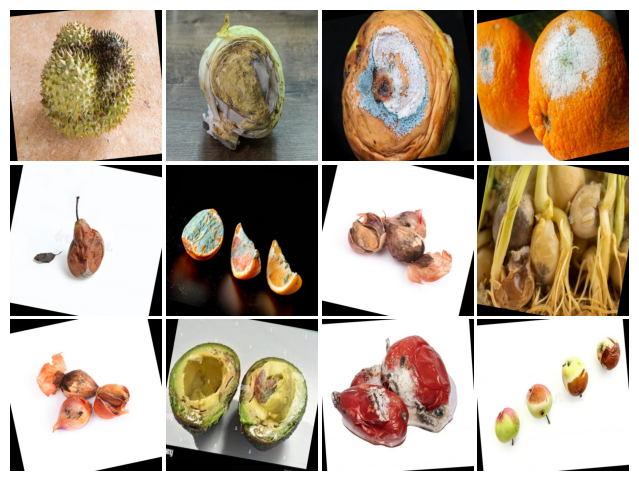

In [ ]:
show_dataset_images(img_path=TRAINING_DATASET_PATH, start=100, size=12, randomize=True)

### Validation Set Samples

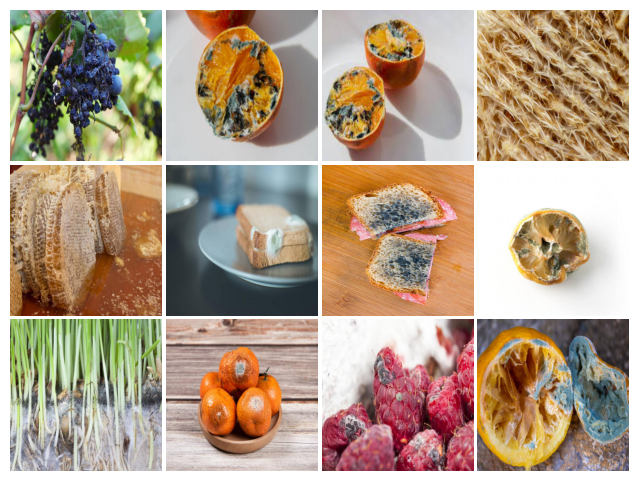

In [ ]:
show_dataset_images(img_path=VALIDATION_DATASET_PATH, size=12, randomize=True)

### Test Set Samples

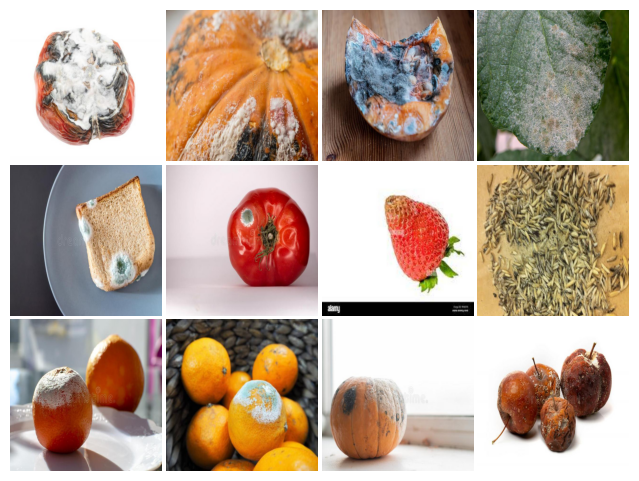

In [ ]:
show_dataset_images(img_path=TESTING_DATASET_PATH, size=12, randomize=True)

# TRAINING OUR CUSTOM MODEL

In [ ]:
# changing back to home directory
# %cd ../

/content/gdrive/MyDrive/Colab Notebooks/Hellen Emotion Detection with Roboflow Yolov7_v8/yolov8


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={DATASET_PATH}/data.yaml epochs=150 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 70.7MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=datasets/mold-detection-project-2/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, op

# Training Results

In [ ]:
!ls runs/detect/train

args.yaml					    train_batch0.jpg
events.out.tfevents.1681993815.92a18596ee4e.5051.0  train_batch1.jpg
results.csv					    train_batch2.jpg
results.png					    weights


## Custom Model Training Results

In [ ]:
results_df = pd.read_csv('runs/detect/train/results.csv')
results_df

epoch           train/box_loss           train/cls_loss  \
0                         0                  2.02260                  2.72150   
1                         1                  1.69550                  2.00550   
2                         2                  1.64710                  1.87370   
3                         3                  1.65430                  1.81550   
4                         4                  1.63010                  1.76160   
..                      ...                      ...                      ...   
73                       73                  0.84954                  0.54951   
74                       74                  0.84164                  0.54060   
75                       75                  0.81985                  0.52390   
76                       76                  0.82415                  0.52365   
77                       77                  0.83552                  0.51516   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                    2.0644                  0.34748                  0.27665   
1                    1.7313                  0.29811                  0.29188   
2                    1.6416                  0.34145                  0.31980   
3                    1.6075                  0.27440                  0.28426   
4                    1.6018                  0.32481                  0.23096   
..                      ...                      ...                      ...   
73                   1.0648                  0.46183                  0.28968   
74                   1.0606                  0.49456                  0.29801   
75                   1.0492                  0.39679                  0.27665   
76                   1.0484                  0.47126                  0.27665   
77                   1.0481                  0.35710                  0.31472   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                   0.19362                  0.07422                   2.1490   
1                   0.25468                  0.10524                   2.0101   
2                   0.24943                  0.10058                   2.0425   
3                   0.22497                  0.09793                   2.0761   
4                   0.18783                  0.07229                   2.3086   
..                      ...                      ...                      ...   
73                  0.26471                  0.12828                   2.2367   
74                  0.26251                  0.12392                   2.2330   
75                  0.24636                  0.12119                   2.2822   
76                  0.27714                  0.12890                   2.2836   
77                  0.26329                  0.12835                   2.2742   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
0                    2.4456                   2.1020                 0.070484   
1                    2.2127                   1.7979                 0.040440   
2                    2.6059                   1.8925                 0.010353   
3                    2.6193                   1.8765                 0.009802   
4                    2.5256                   2.2077                 0.009802   
..                      ...                      ...                      ...   
73                   3.0009                   2.1380                 0.005248   
74                   2.9178                   2.1765                 0.005182   
75                   3.2720                   2.2226                 0.005116   
76                   2.8634                   2.1487                 0.005050   
77                   2.8463                   2.1508                 0.004984   

                     lr/pg1                   lr/pg2  
0                  0.003280                 0.003280  
1                  0

In [ ]:
results_df.columns

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

In [ ]:
results_df.rename(columns={x:x.strip() for x in results_df.columns}, inplace=True)
results_df.columns

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

In [ ]:
import plotly.express as plotly

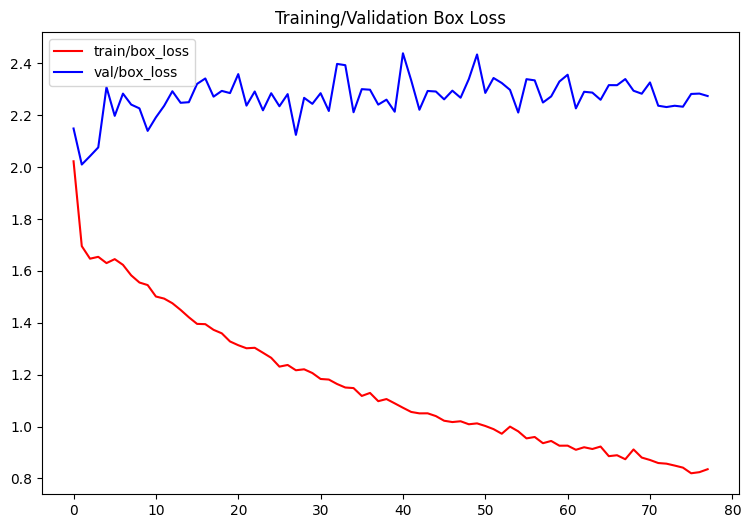

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(results_df['epoch'], results_df['train/box_loss'], color='r', label='train/box_loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], color='b', label='val/box_loss')
plt.title('Training/Validation Box Loss')
plt.legend()

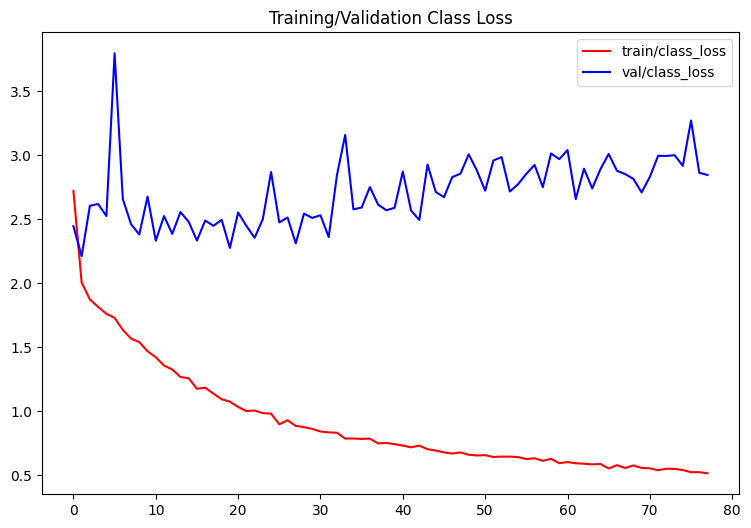

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(results_df['epoch'], results_df['train/cls_loss'], color='r', label='train/class_loss')
plt.plot(results_df['epoch'], results_df['val/cls_loss'], color='b', label='val/class_loss')
plt.title('Training/Validation Class Loss')
plt.legend()

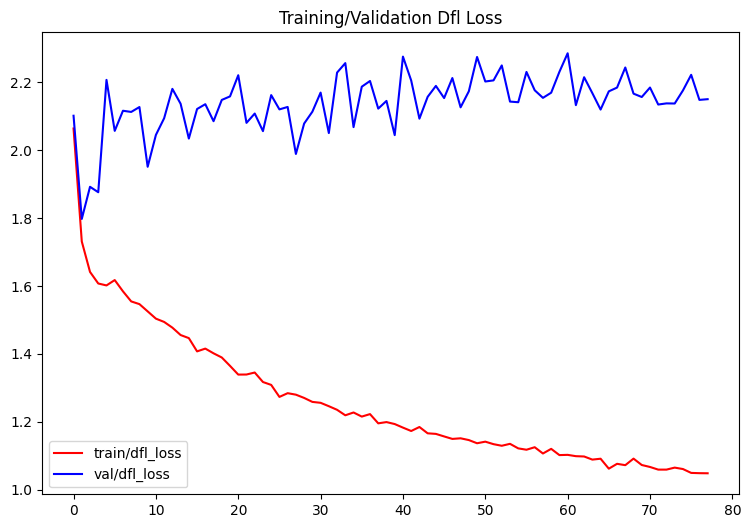

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(results_df['epoch'], results_df['train/dfl_loss'], color='r', label='train/dfl_loss')
plt.plot(results_df['epoch'], results_df['val/dfl_loss'], color='b', label='val/dfl_loss')
plt.title('Training/Validation Dfl Loss')
plt.legend()

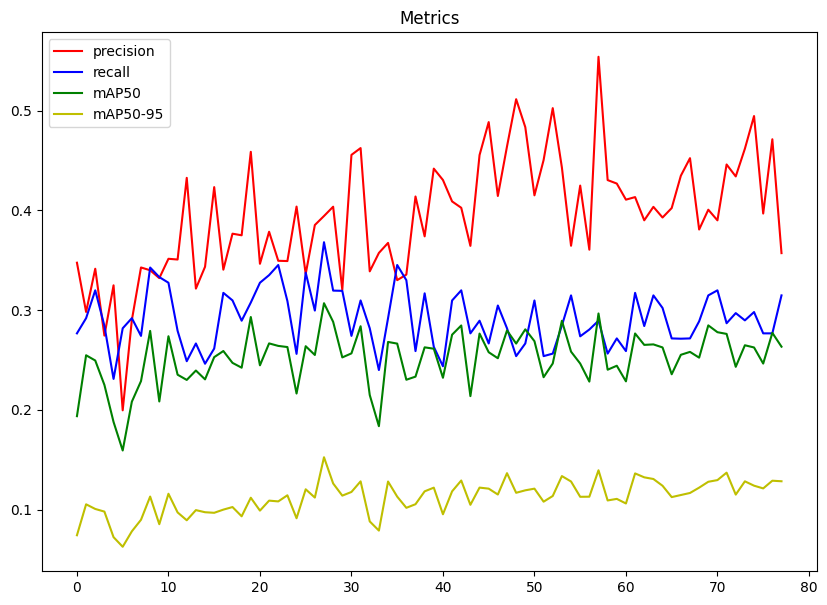

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], color='r', label='precision')
plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], color='b', label='recall')
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], color='g', label='mAP50')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], color='y', label='mAP50-95')
plt.title('Metrics')
plt.legend()


### Training Batch0

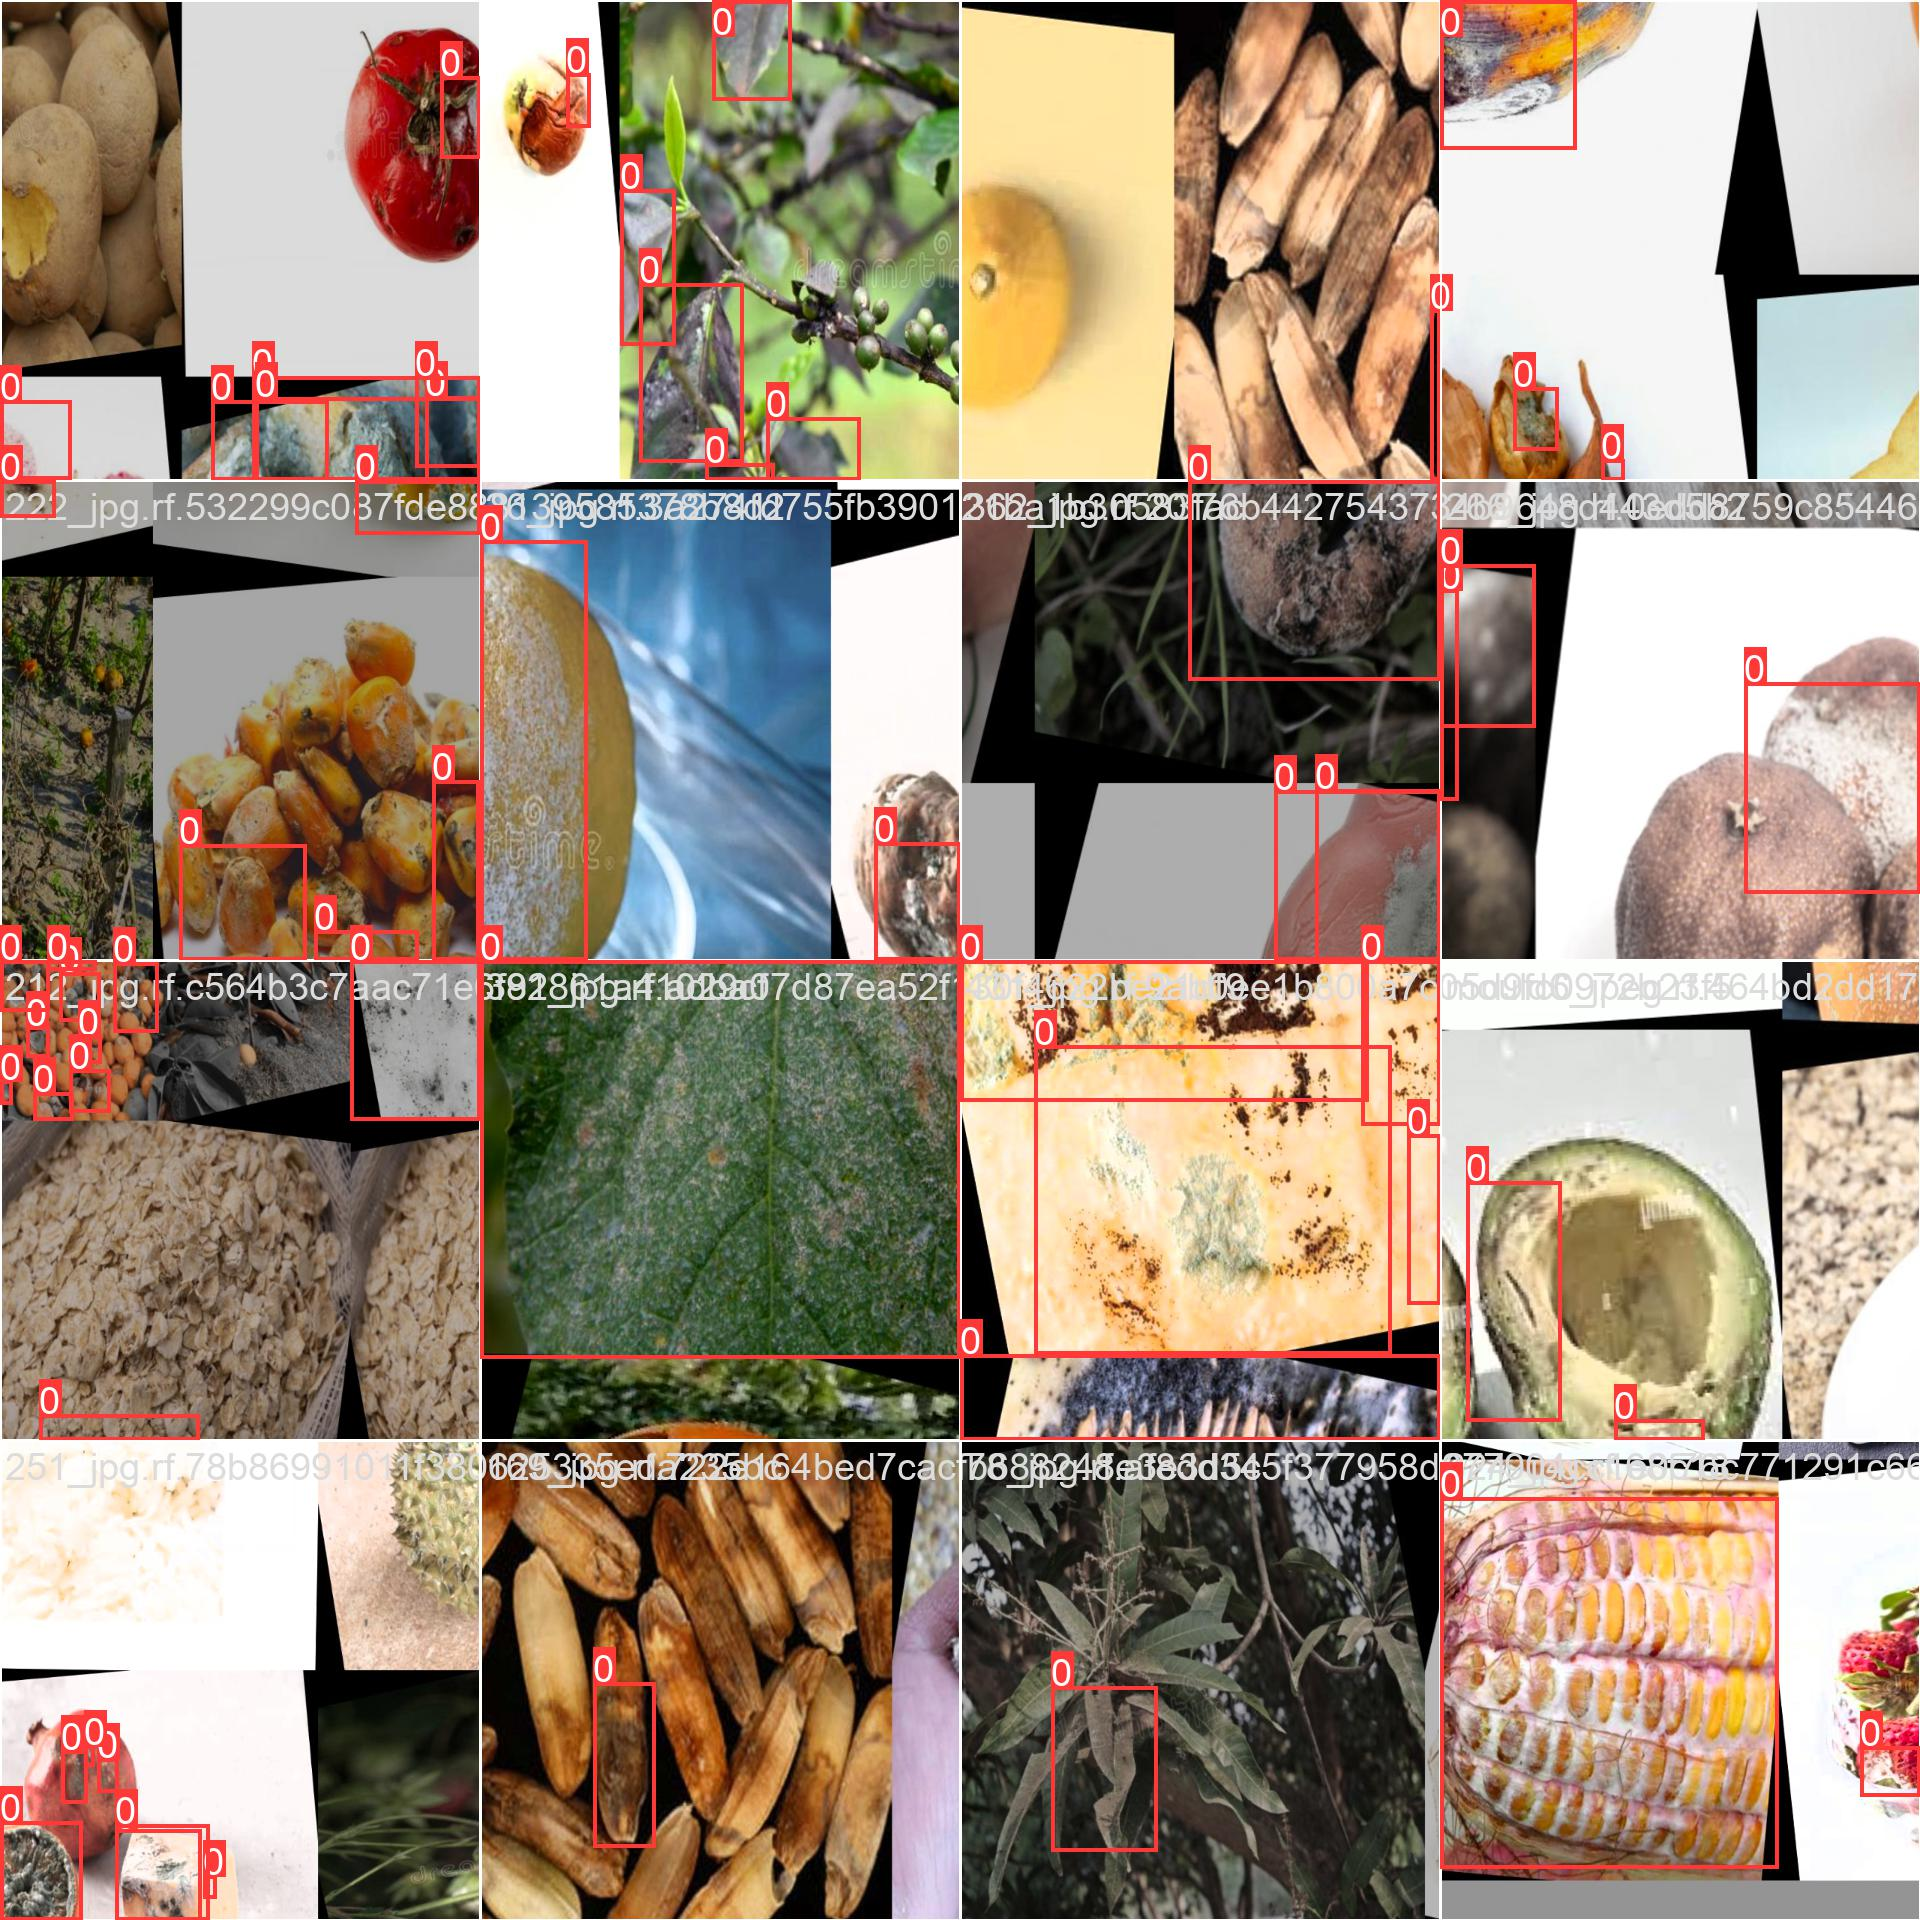

In [ ]:
Image(filename=f'runs/detect/train/train_batch0.jpg', width=600)

### Validation Batch0 Labels

In [ ]:
# Image(filename=f'runs/detect/train/val_batch0_labels.jpg', width=600)

### Validation Batch0 Prediction

In [ ]:
# Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

## Training Performances Results

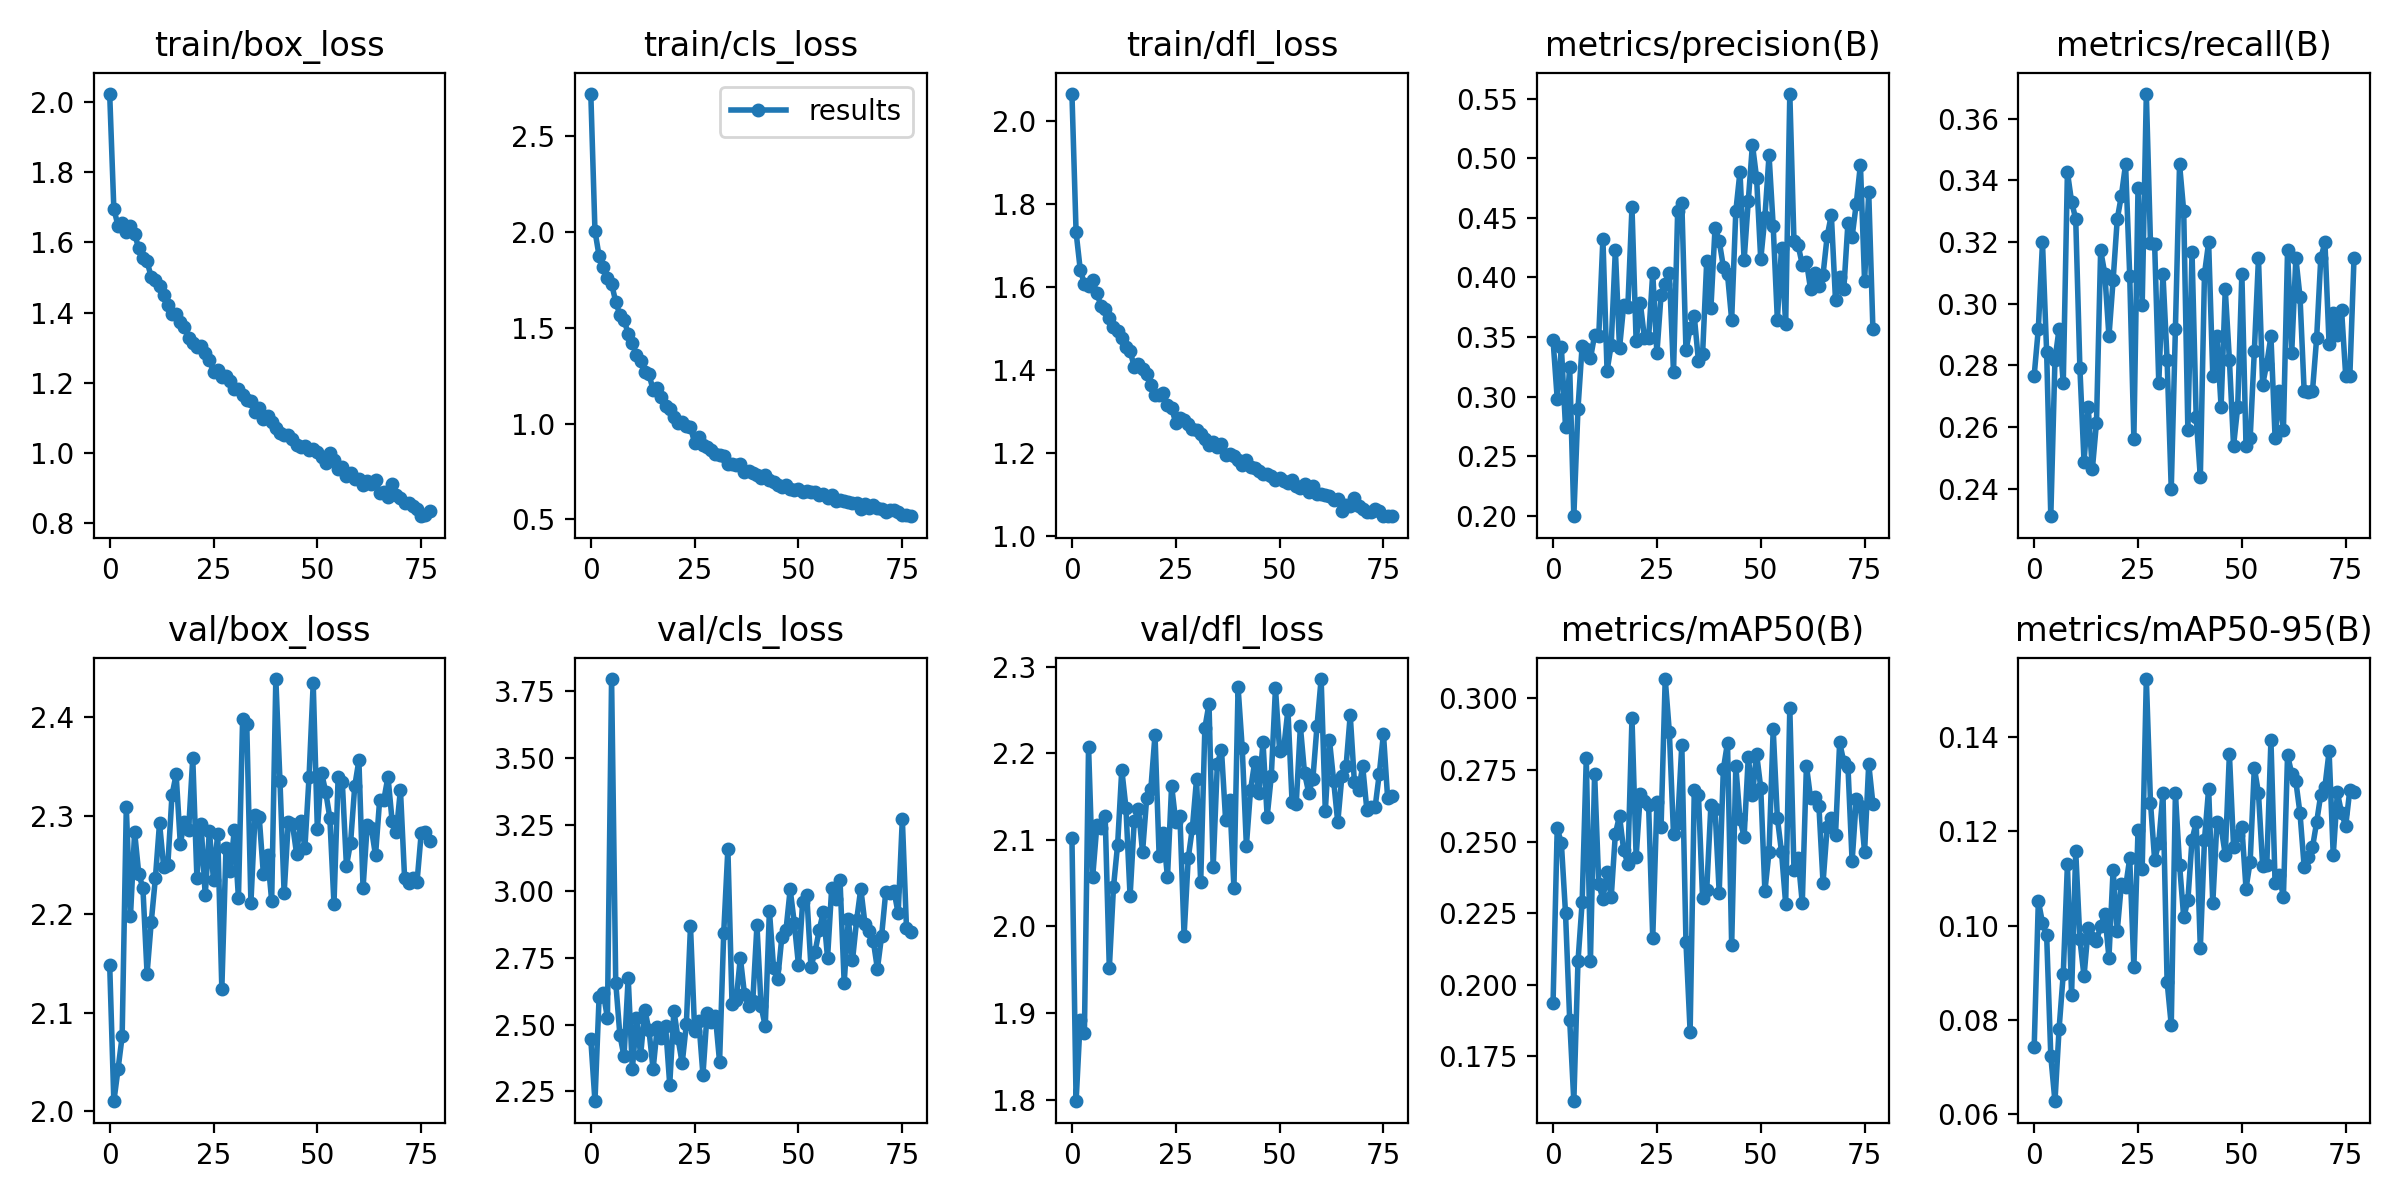

In [ ]:
#display Training Results

for imageName in glob.glob('runs/detect/train/*.png'): # png files are holding training performance results
    display(Image(filename=imageName))
    print("\n")

# MODEL VALIDATION ON VALIDATION-SET

# validating our Custom Trained Yolov8 Model on The Validation Set

In [ ]:
DATASET_PATH

'datasets/mold-detection-project-2'

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={DATASET_PATH}/data.yaml

2023-04-20 15:01:05.326024: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 15:01:07.183291: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 23.1MB/s]
val: Scanning /content/gdrive/MyDrive/Colab Notebooks/Olubukola_Mold_Detection_Project/yolov8/datasets/mold-detection-project-2/valid/labels.cache... 93 images, 0 backgrounds, 0 corrupt: 100% 93/93 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [01:51<00:00, 18.52s/it]
                   all         93        39

## Model Results on Validation Sets

In [ ]:
!ls runs/detect/val

confusion_matrix.png  R_curve.png	     val_batch1_pred.jpg
F1_curve.png	      val_batch0_labels.jpg  val_batch2_labels.jpg
P_curve.png	      val_batch0_pred.jpg    val_batch2_pred.jpg
PR_curve.png	      val_batch1_labels.jpg


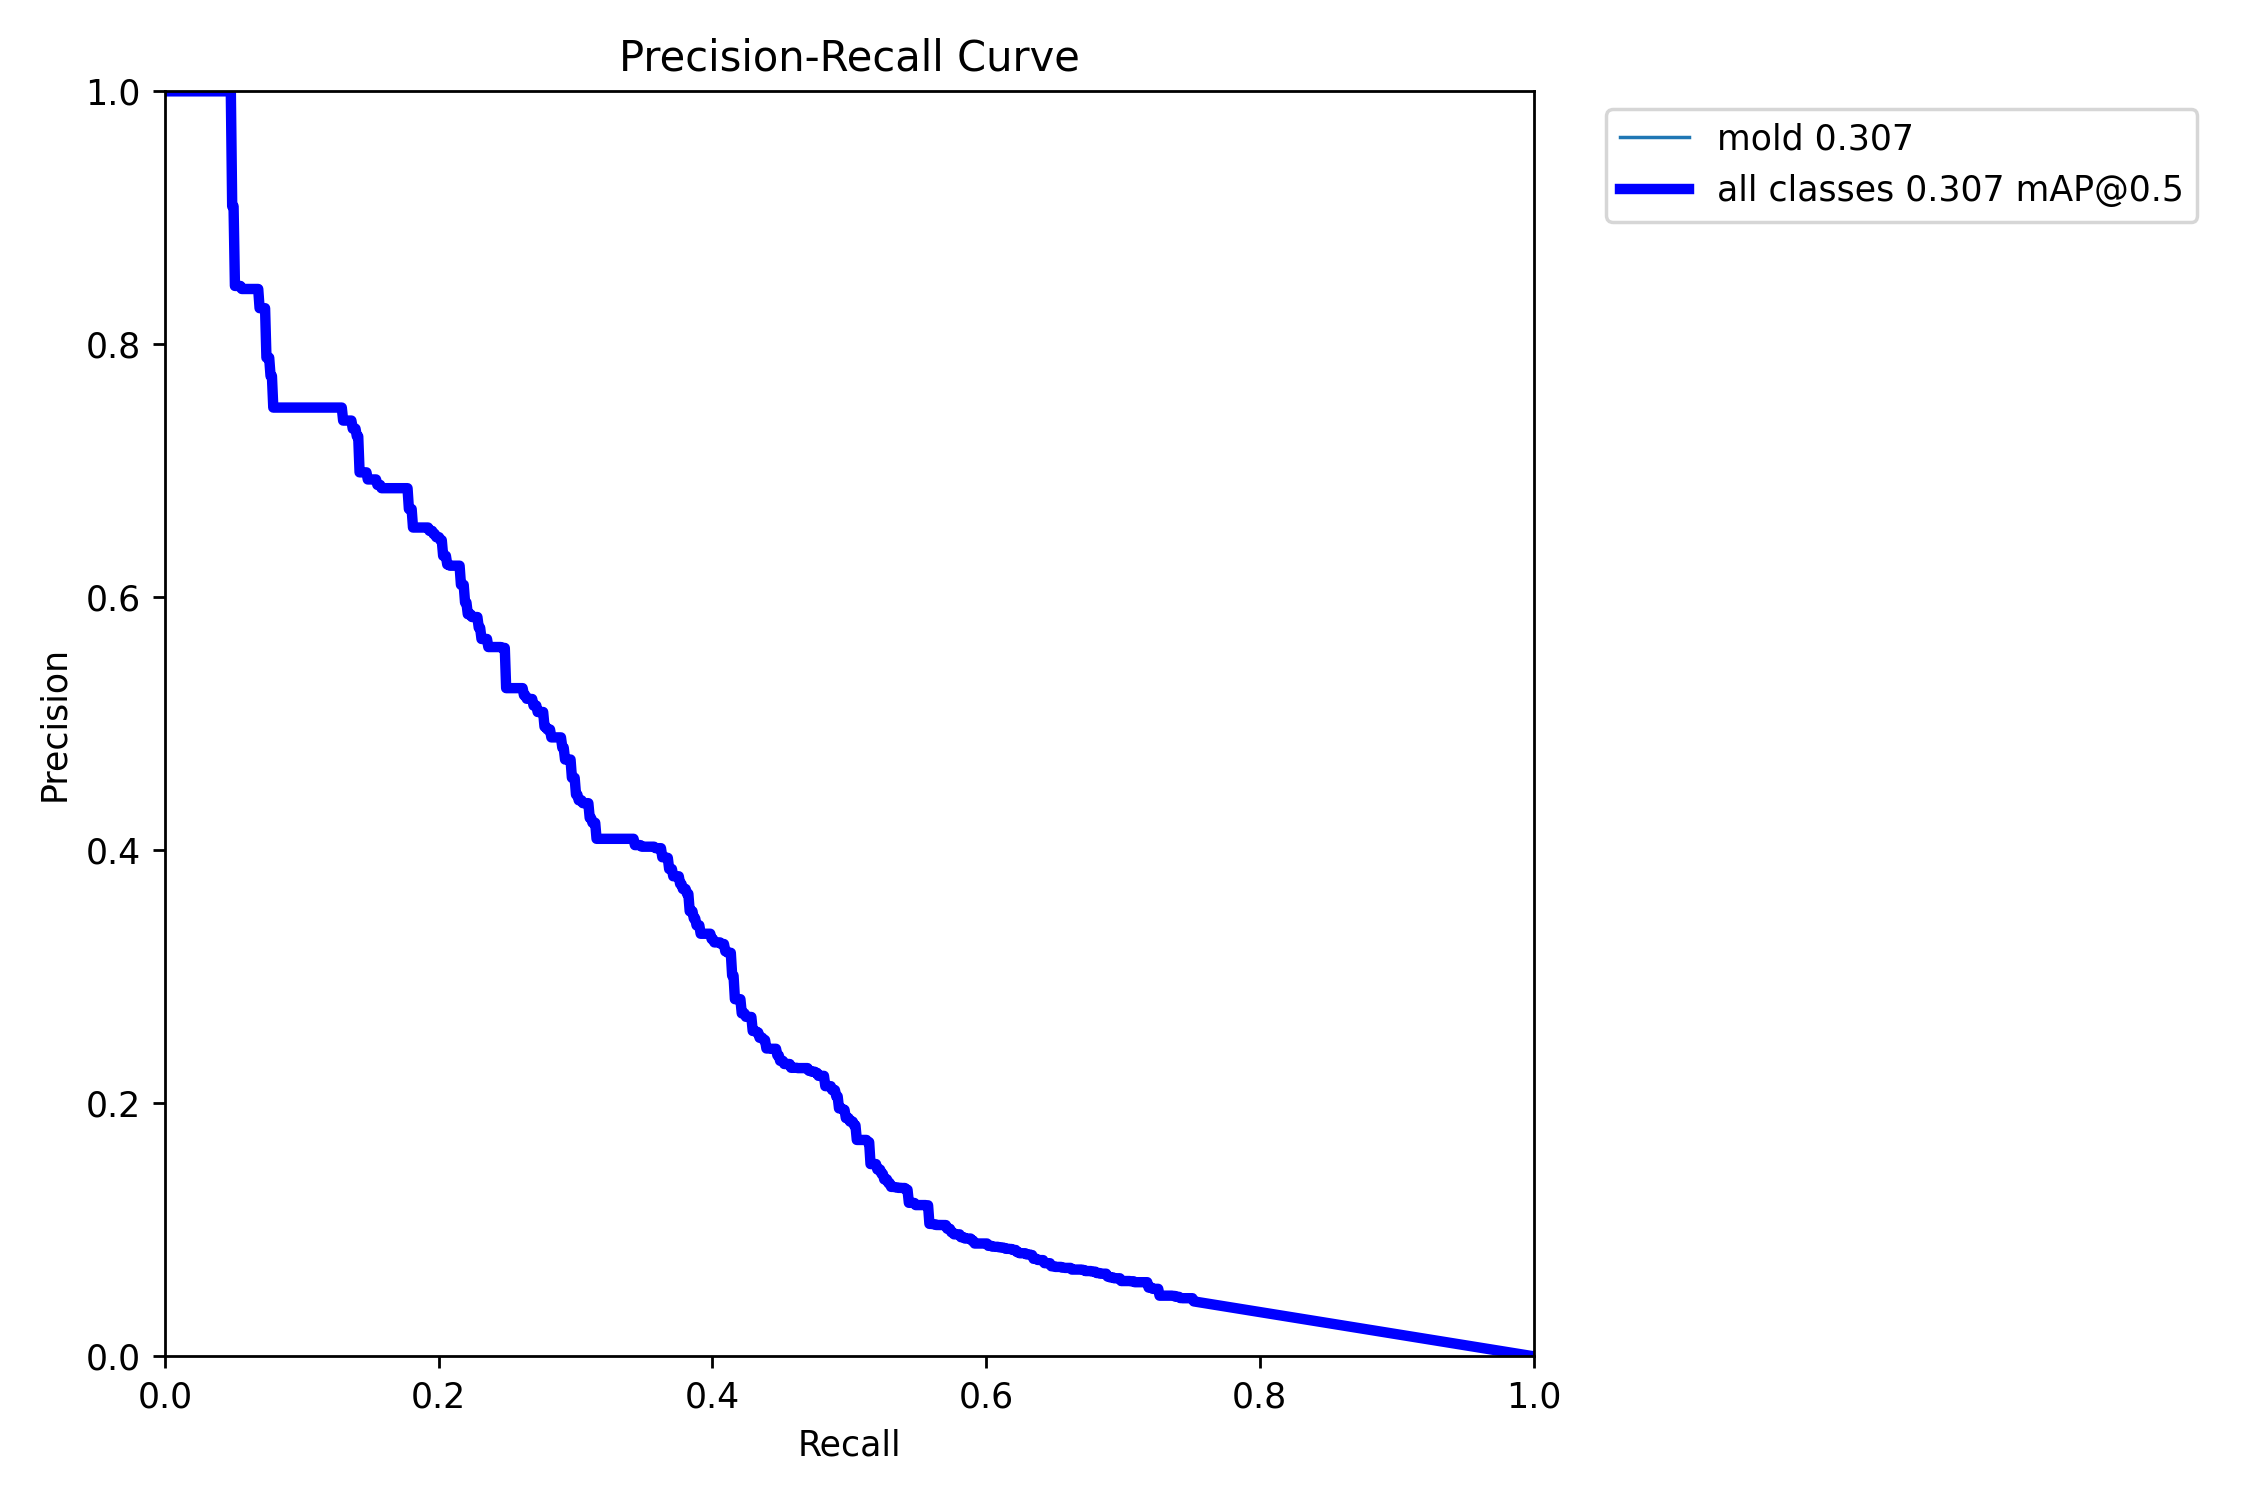

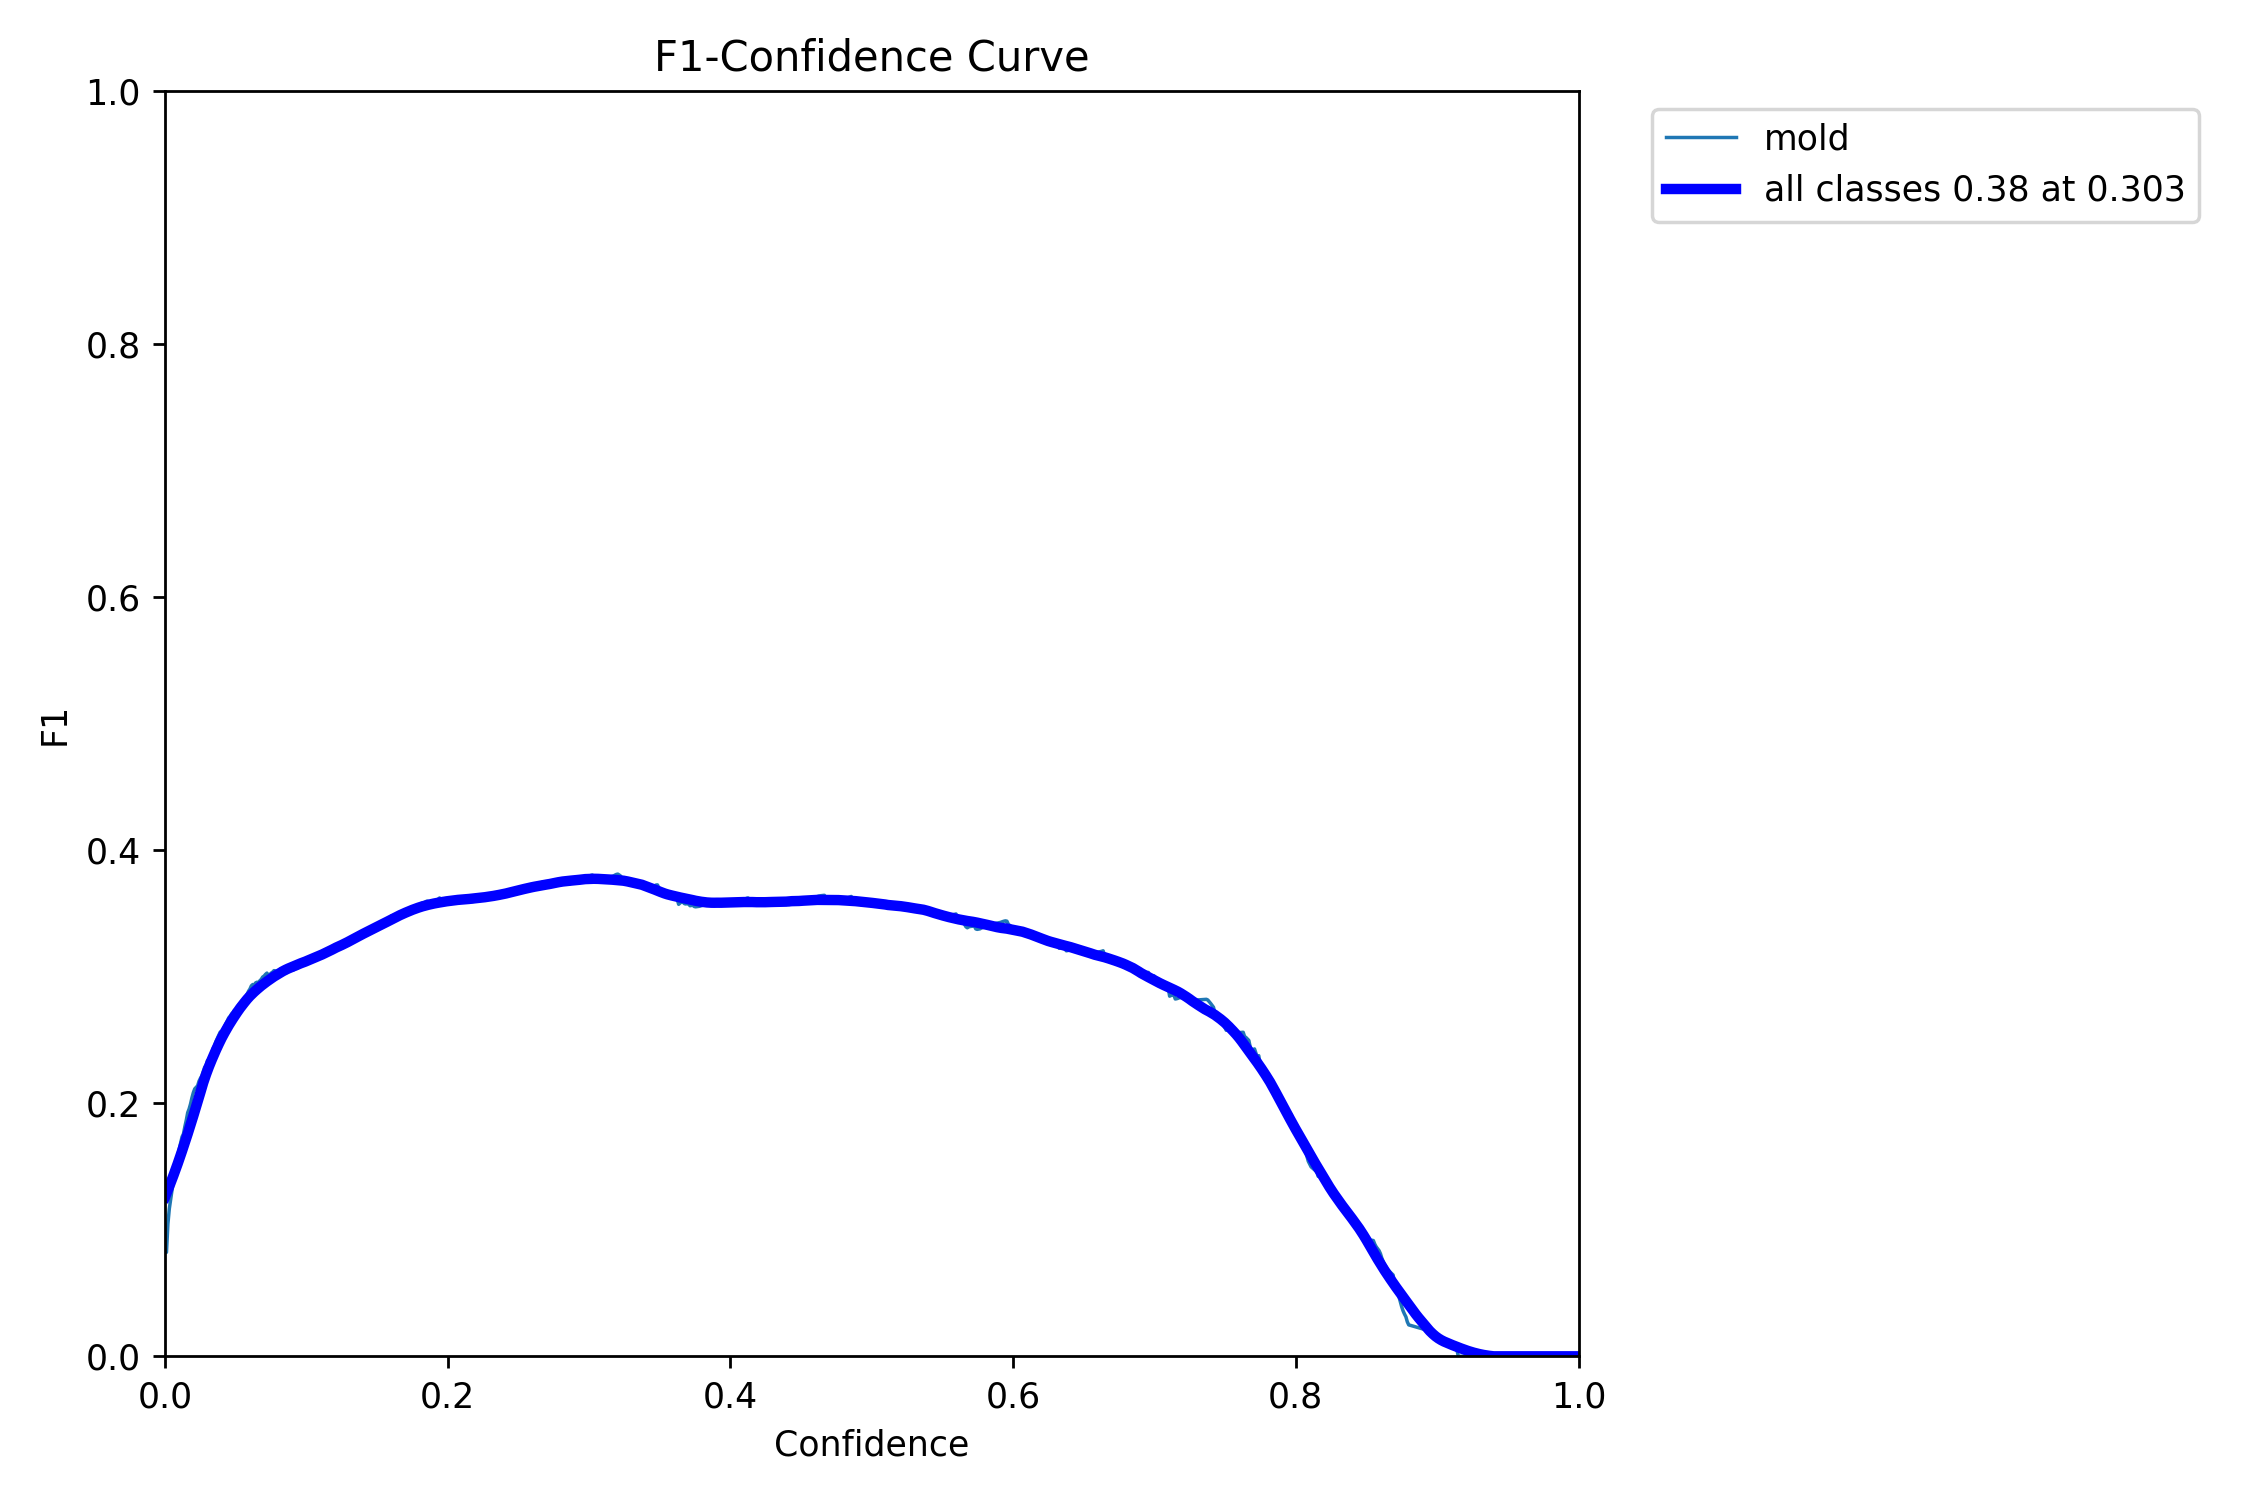

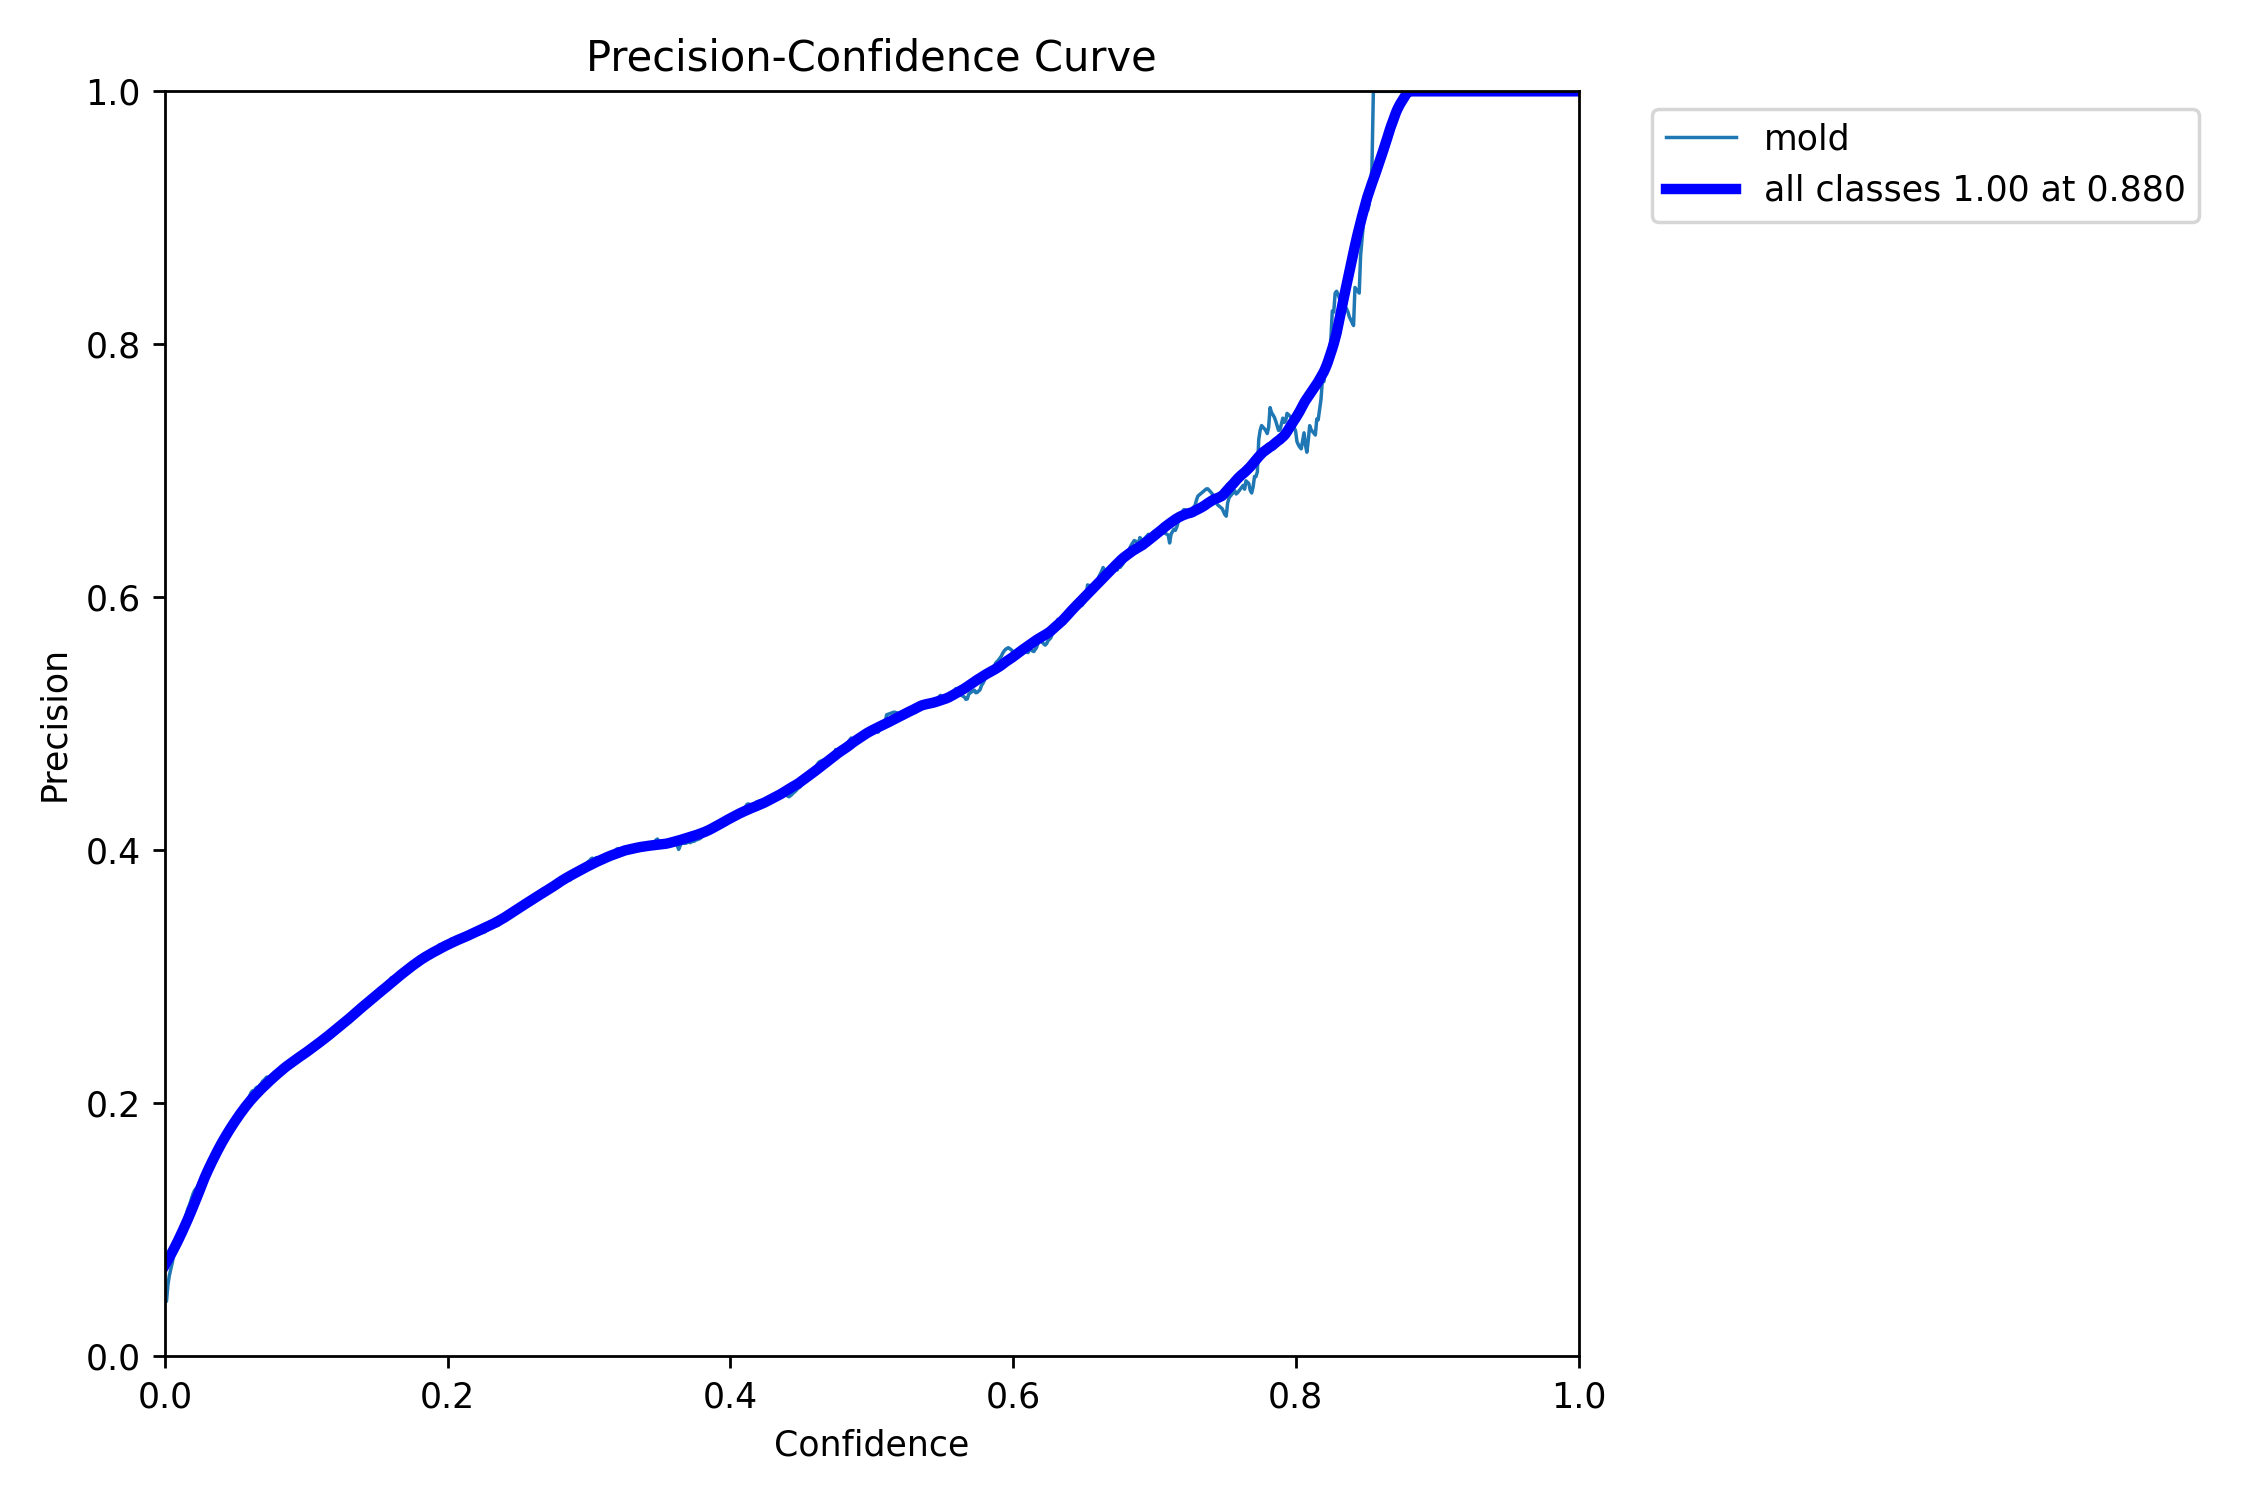

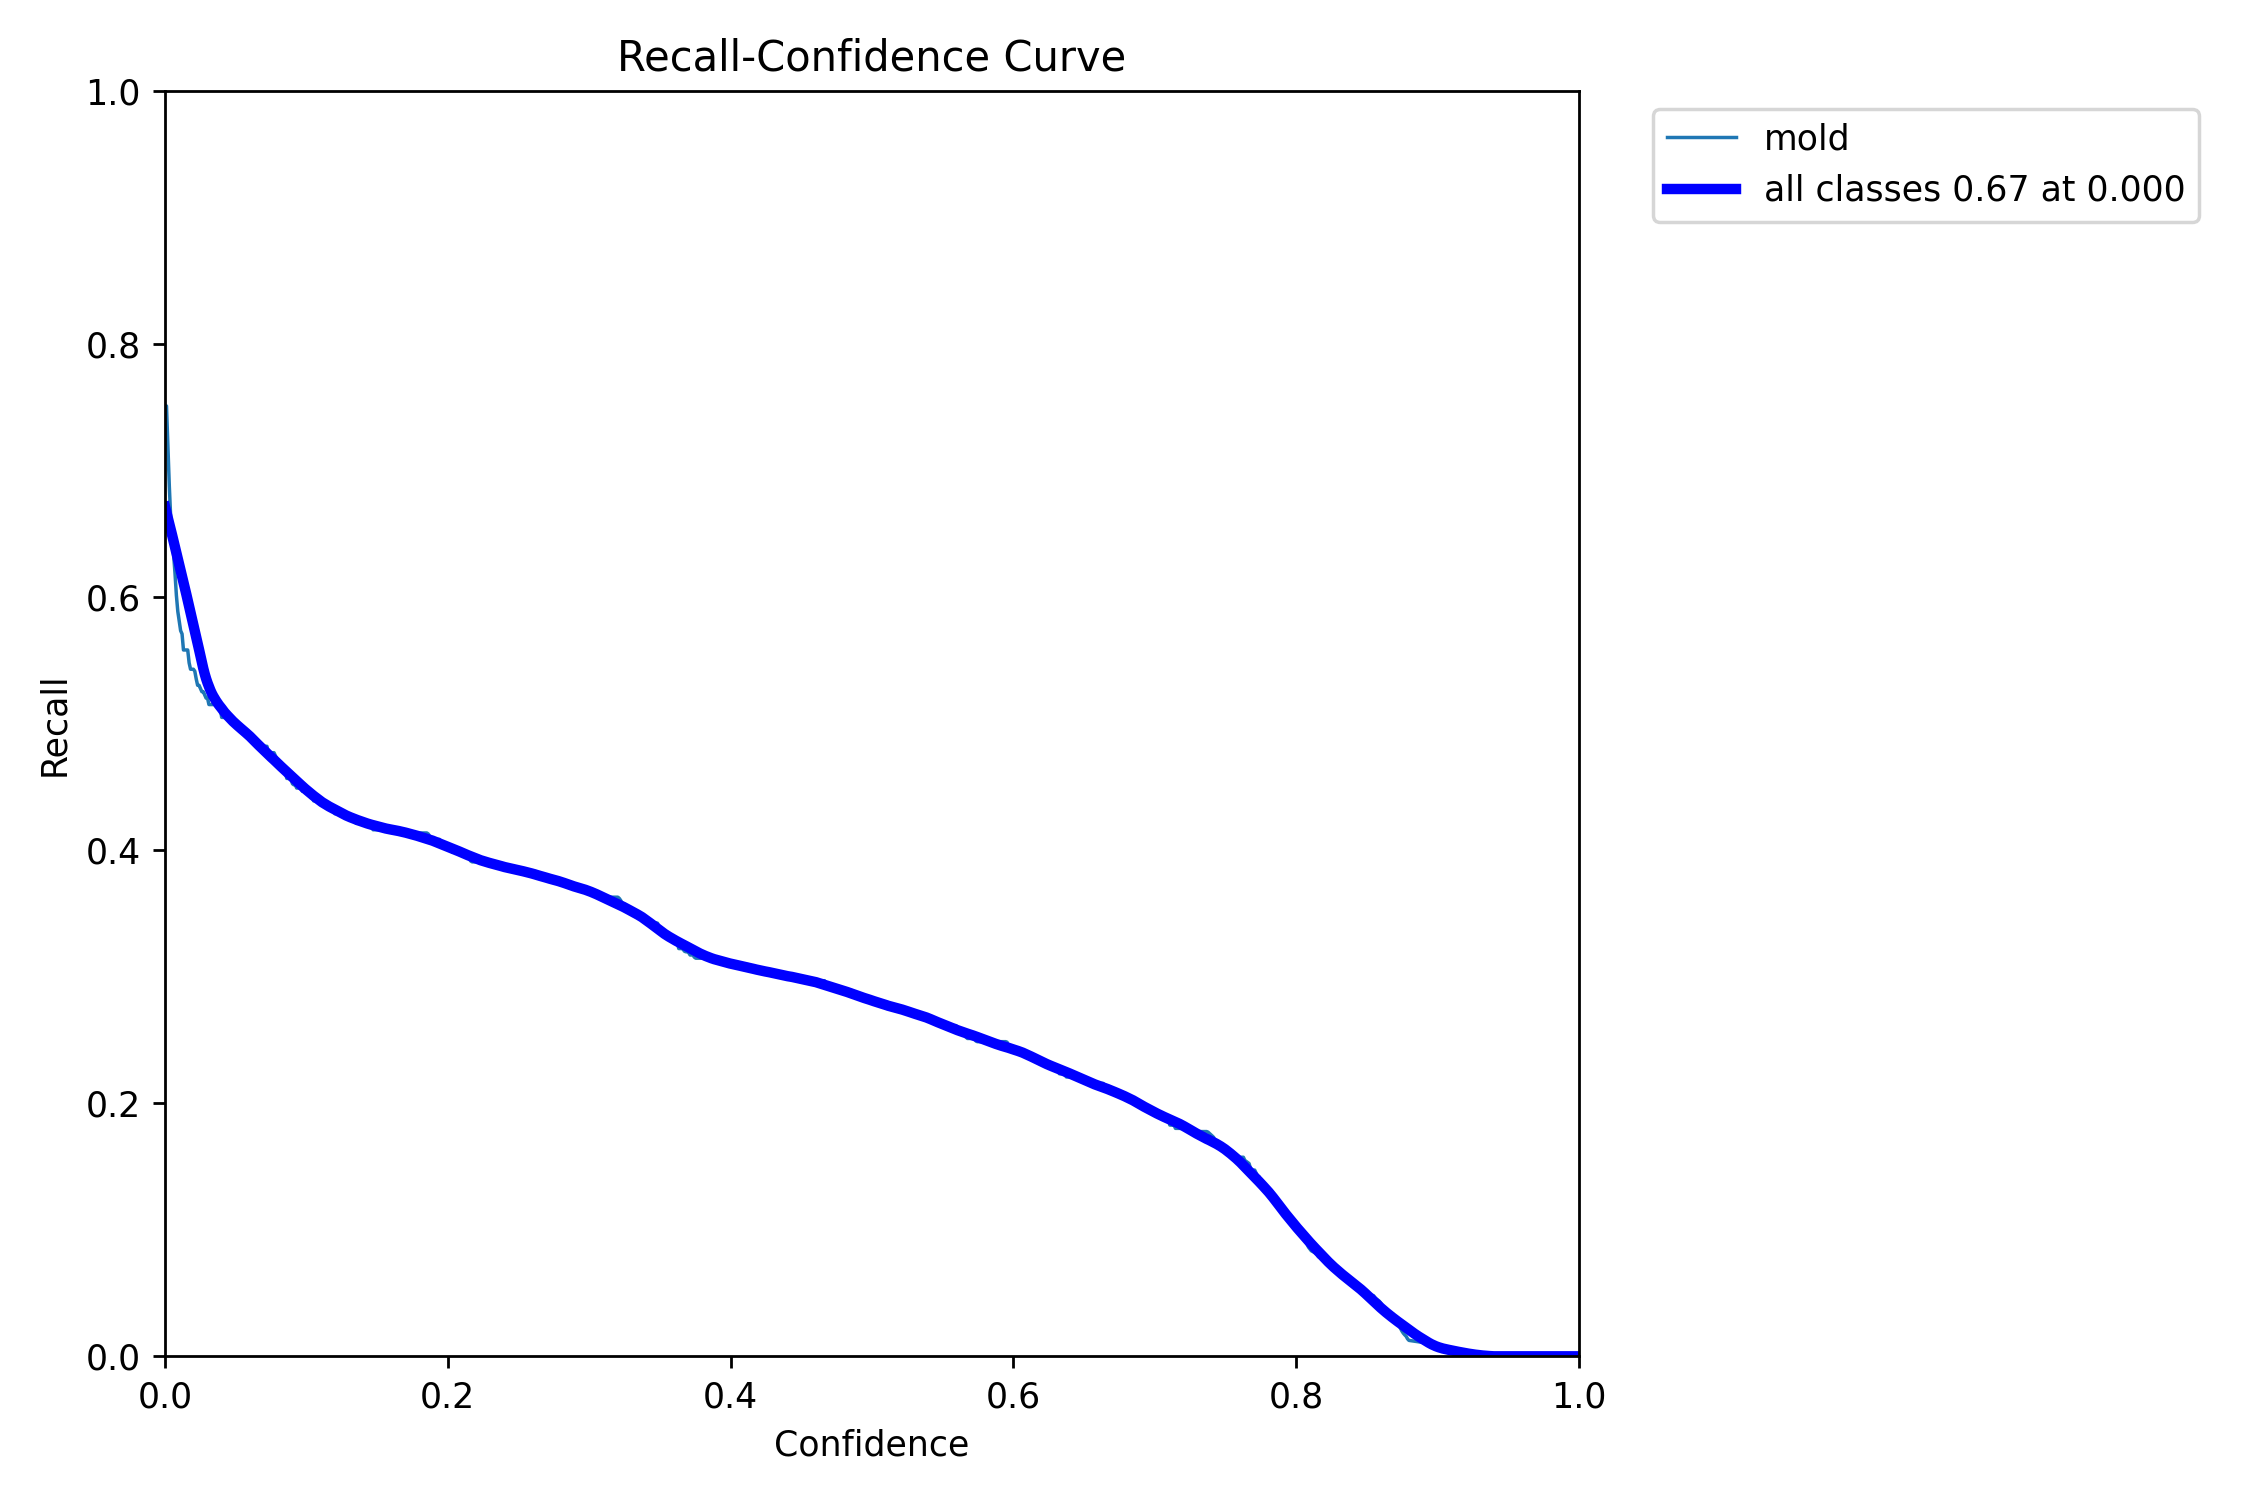

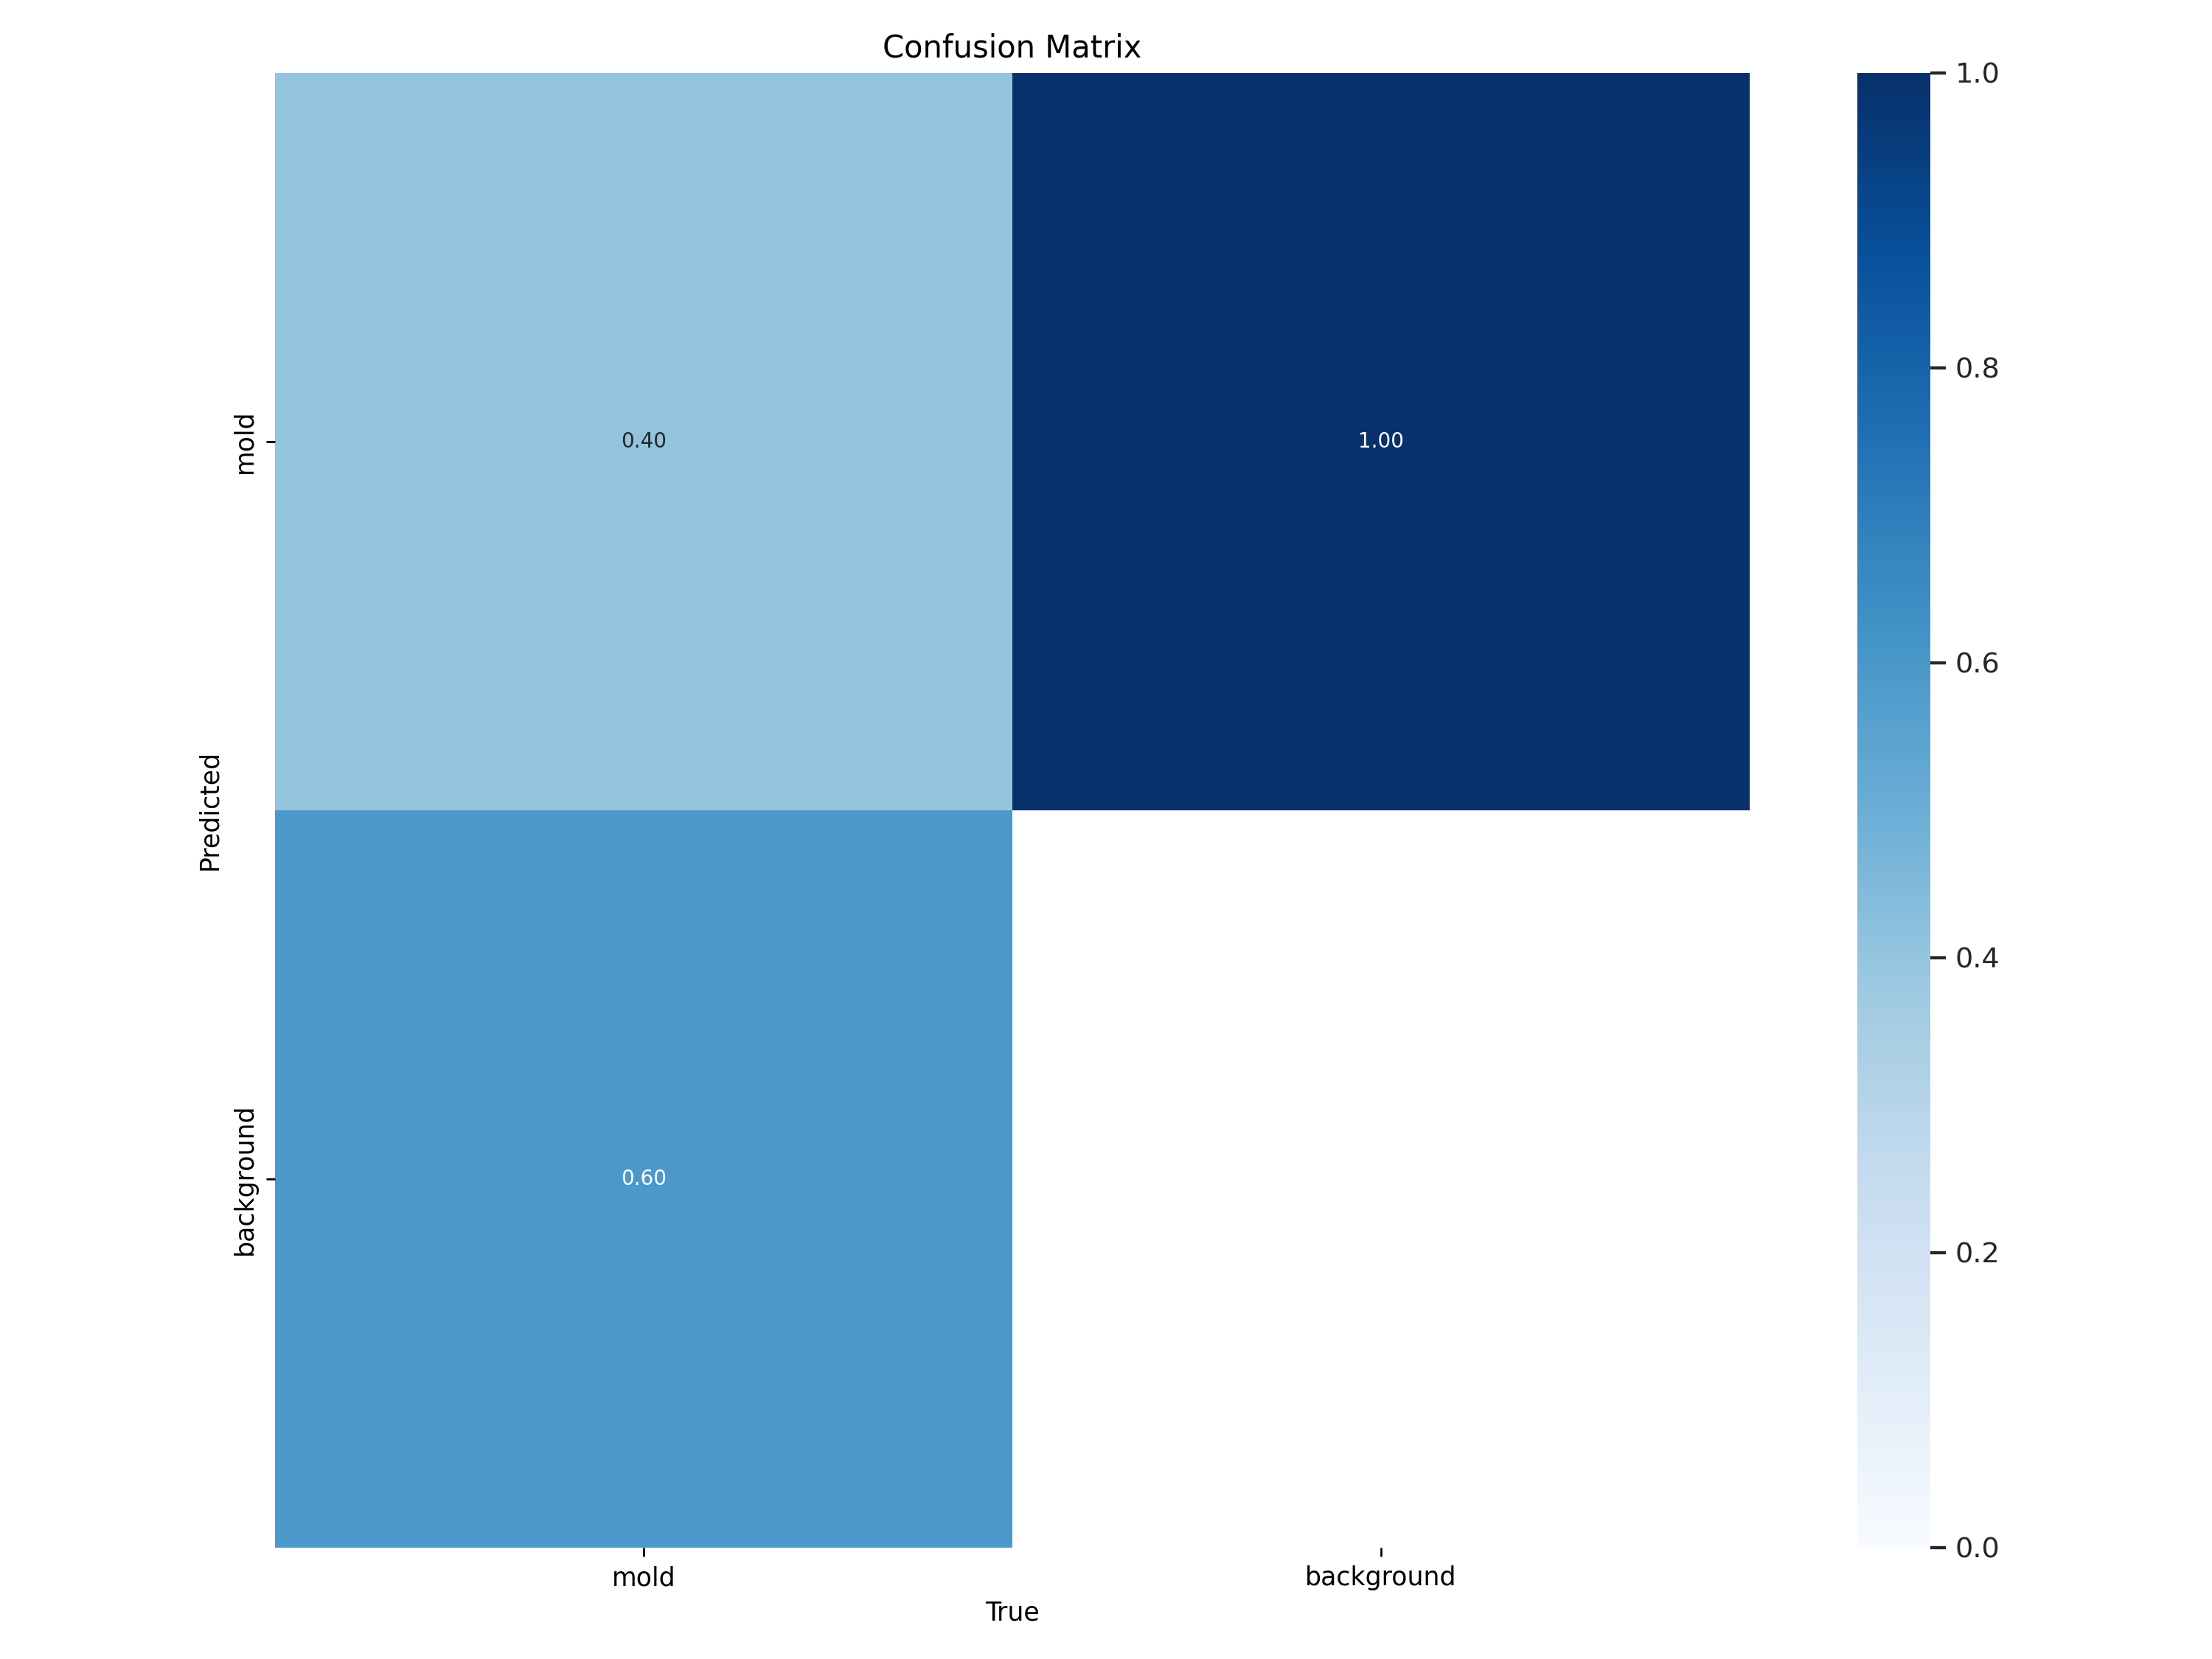

In [ ]:
for imageName in glob.glob('runs/detect/val/*.png'): # png files are holding training performance results
    display(Image(filename=imageName))
    print("\n")

# PREDICTIONS ON TEST-SET

# Making Inference with the Custom Model on The Test Set (Unseen Images)

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source={DATASET_PATH}/test/images save=True

2023-04-20 15:16:09.551849: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 15:16:10.816063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/53 /content/gdrive/MyDrive/Colab Notebooks/Olubukola_Mold_Detection_Project/yolov8/datasets/mold-detection-project-2/test/images/102_jpg.rf.f817c1f0683a6d84a6106f77b3d3c7ba.jpg: 640x640 1 mold, 989.6ms
image 2/53 /content/gdrive/MyDrive/Colab Notebooks/Olubukola_Mold_Detection_Project/yolov8/datasets/mold-detection-project-2/test/images/105_jpg.rf.fc441406dc9ab706c95f2f99263fe3f4.jpg: 640x640 2 molds, 922.7ms


# Inference Results

In [ ]:
!ls runs/detect/predict

102_jpg.rf.f817c1f0683a6d84a6106f77b3d3c7ba.jpg
105_jpg.rf.fc441406dc9ab706c95f2f99263fe3f4.jpg
130_jpg.rf.7312922a9a9f6ae04a9bf35f551a377a.jpg
137_jpg.rf.31bc703a5534d6d6a6e548154431281a.jpg
139_jpg.rf.e5c9e4ee8ec495920391dc0105c52b5b.jpg
157_jpg.rf.e20d7e29af636be6330a251cbe703cd3.jpg
163_jpg.rf.fd22837cf3c3031132aaa28fc0093d68.jpg
167_jpg.rf.a6fcb8b70563fedac5b77899f94ddcd9.jpg
175_jpg.rf.76265db383f03aca2c42ef07df642390.jpg
186_jpg.rf.d3a17c9137030cf47ea22f3d5afd04a4.jpg
191_jpg.rf.941e7df403b53d3d09e8b5adb14187ce.jpg
20_jpg.rf.ec428fb2f56b2608a469fb6996fe79d7.jpg
213_jpg.rf.bc2124088ddf5bf5ddc8b0eced503771.jpg
217_jpg.rf.14916cd288d8ff481ddf61b06500b01a.jpg
228_jpg.rf.ca62528eb890b15ba390eaa4b37242ab.jpg
231_jpg.rf.8bb702cf7ee2f5b8f7f44ecfa7d0b460.jpg
233_jpg.rf.f9df2d03927463c90603142094556d39.jpg
246_jpg.rf.b6048c6ce5fde876cfc3a20935b307e0.jpg
254_jpg.rf.acca4622444b45c5a5a06969373300b3.jpg
255_jpg.rf.0e2de99fa1fad19a2ec2c3bbbfdc3bc0.jpg
257_jpg.rf.e8672eeb8b8881878512d0f77abb4d

In [ ]:
def display_predicted_images(img_path='.',start=0, number=10):
  i = start
  limit = i + number # max images to print
  for imageName in glob.glob(f'{img_path}/*.jpg')[i:limit]: #assuming JPG
      if i < limit:
        display(Image(filename=imageName))
        print("\n")
      i = i + 1

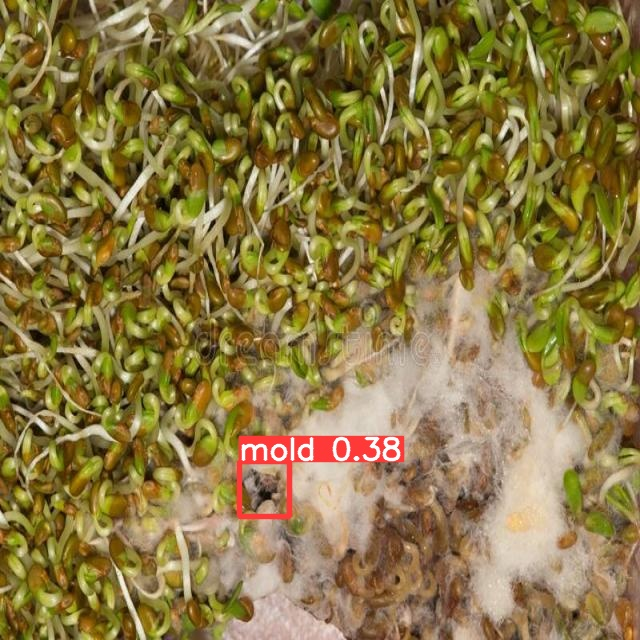

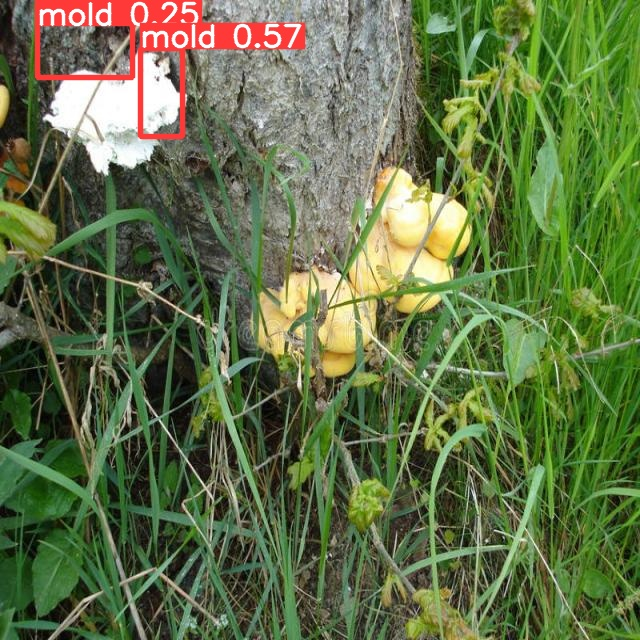

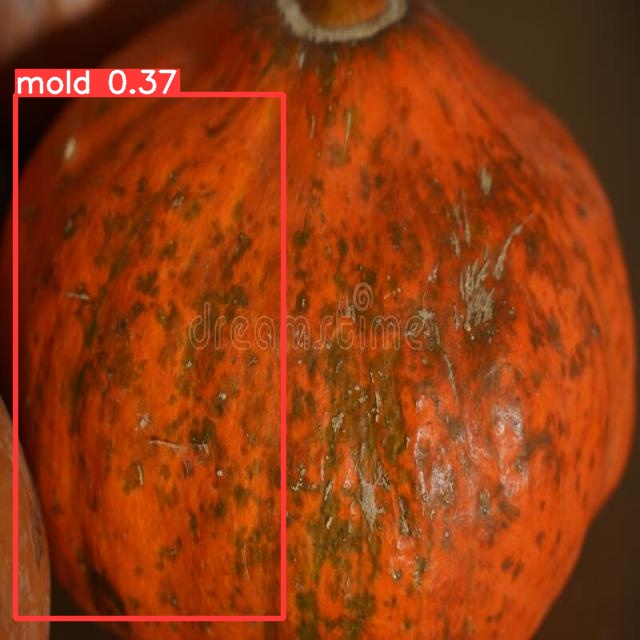

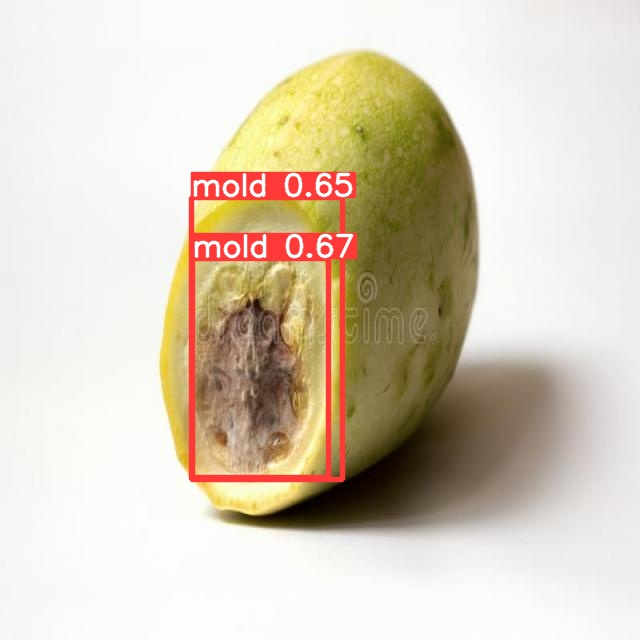

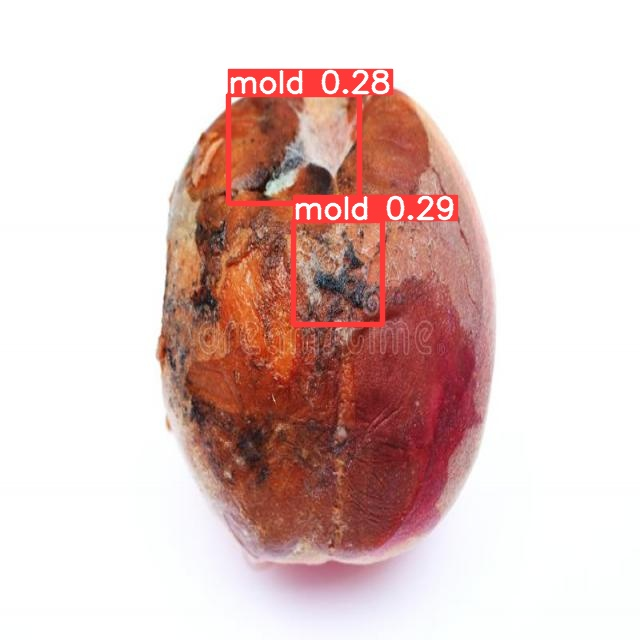

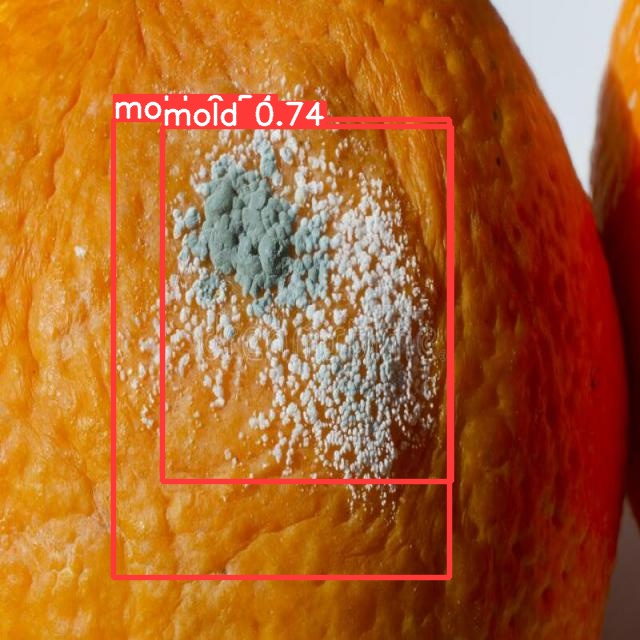

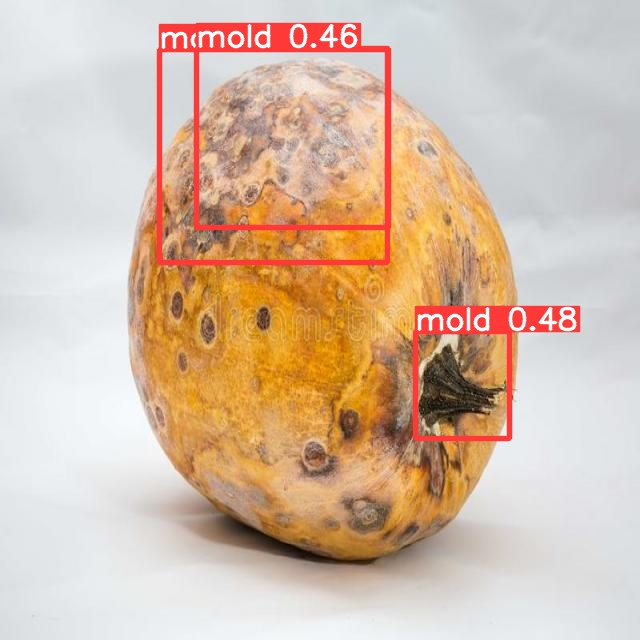

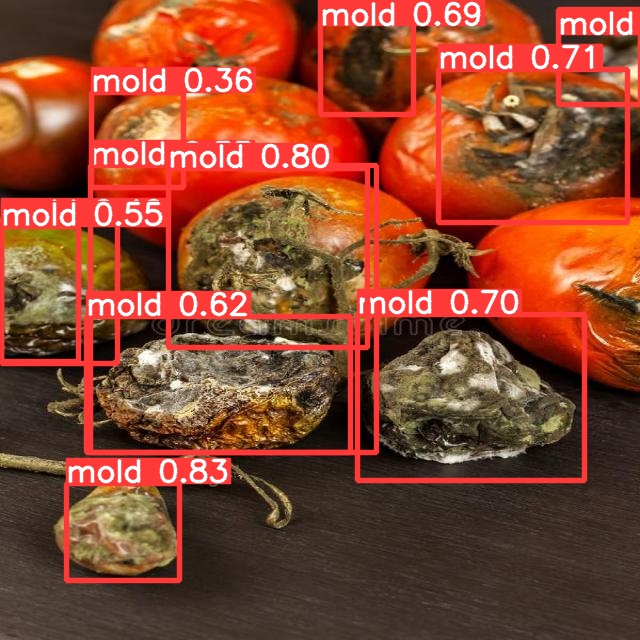

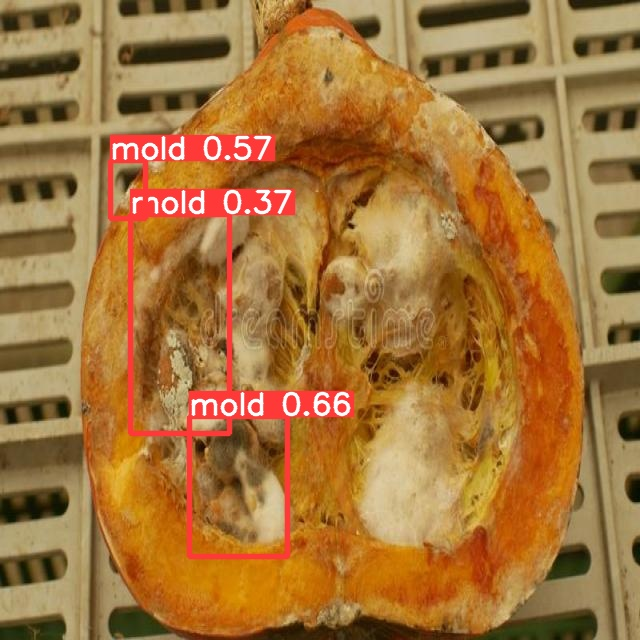

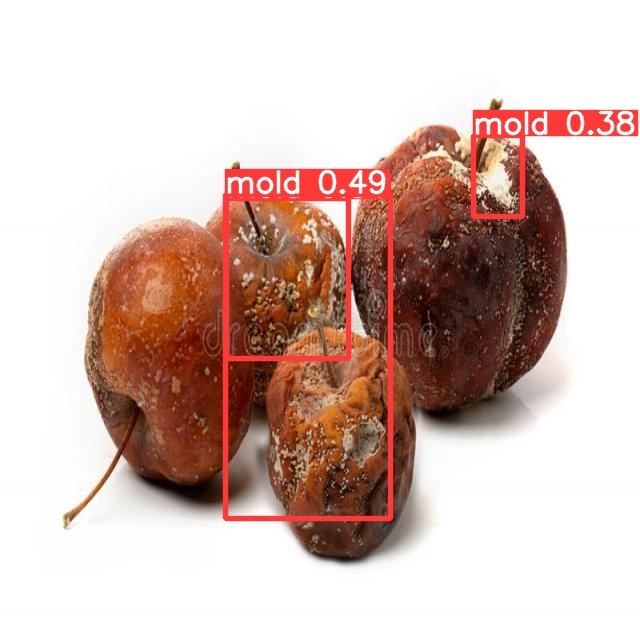

In [ ]:
# Showing first 10 predictions
display_predicted_images(img_path='runs/detect/predict', start=0, number=10)

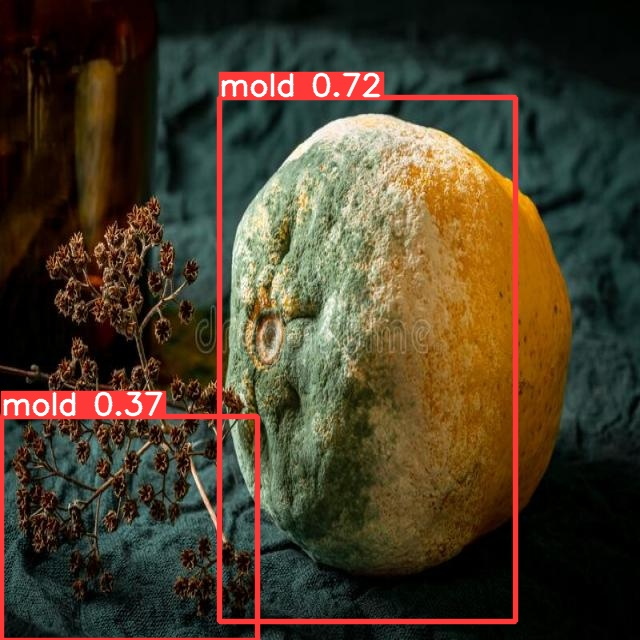

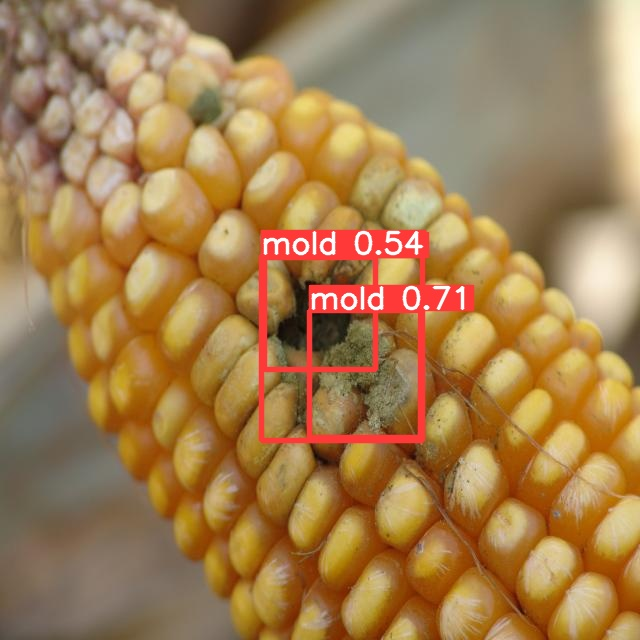

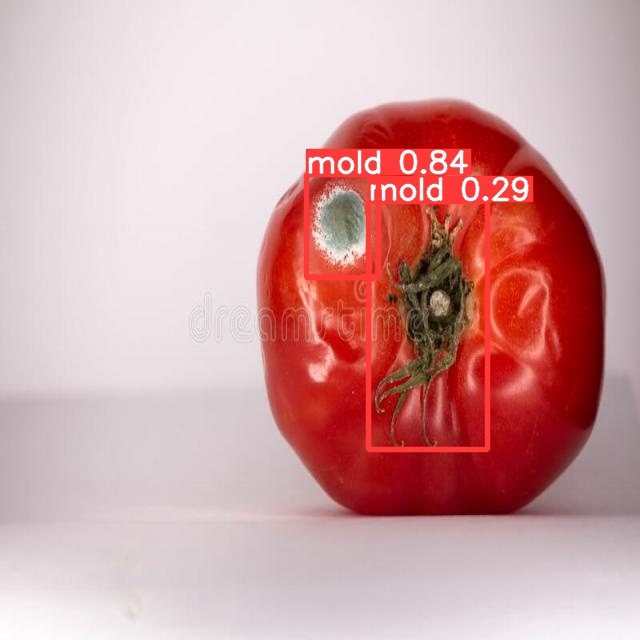

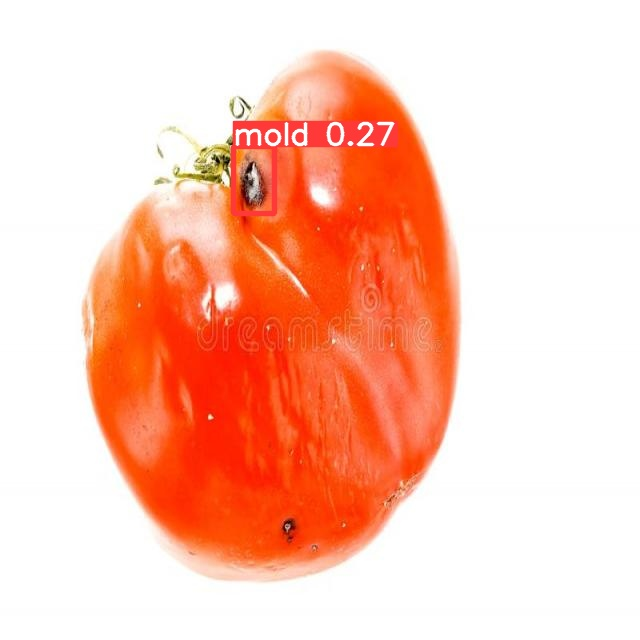

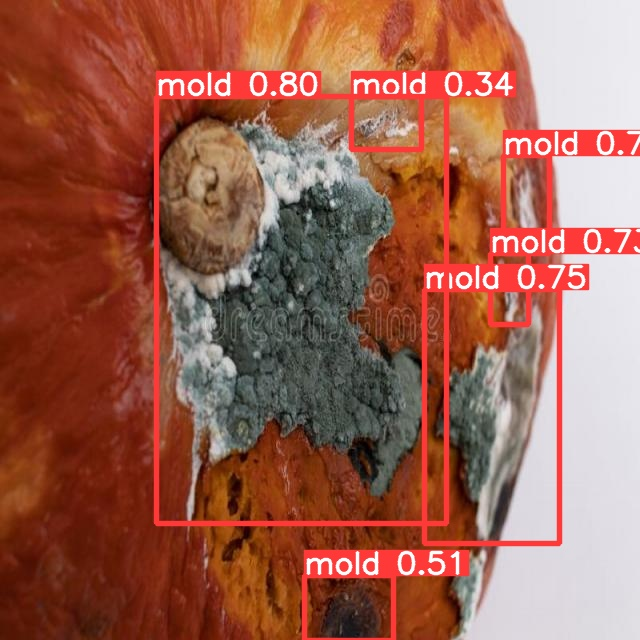

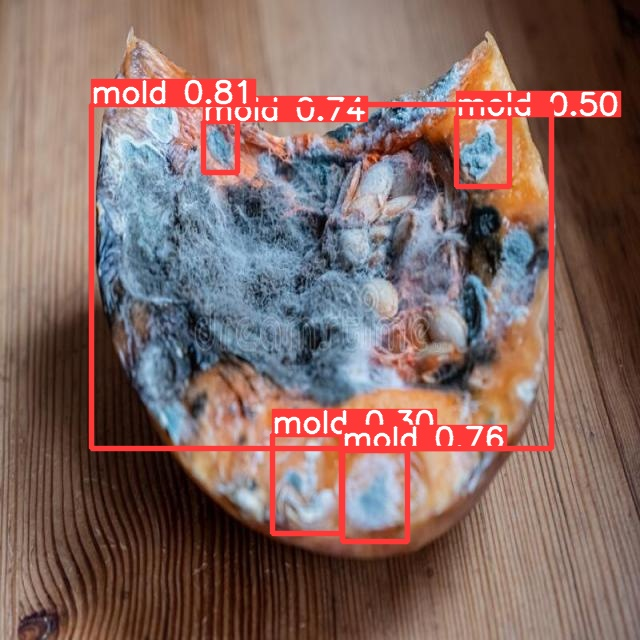

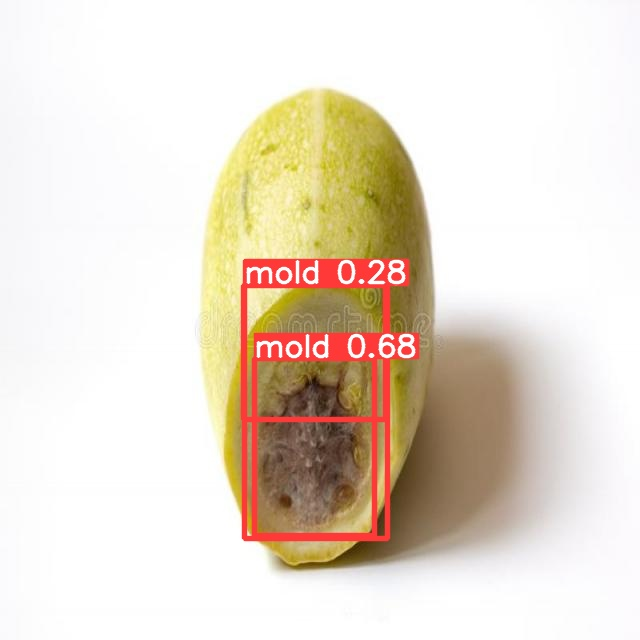

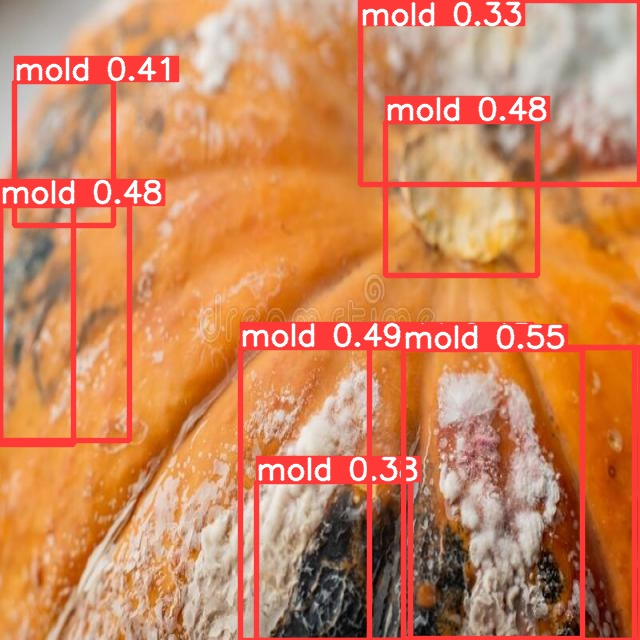

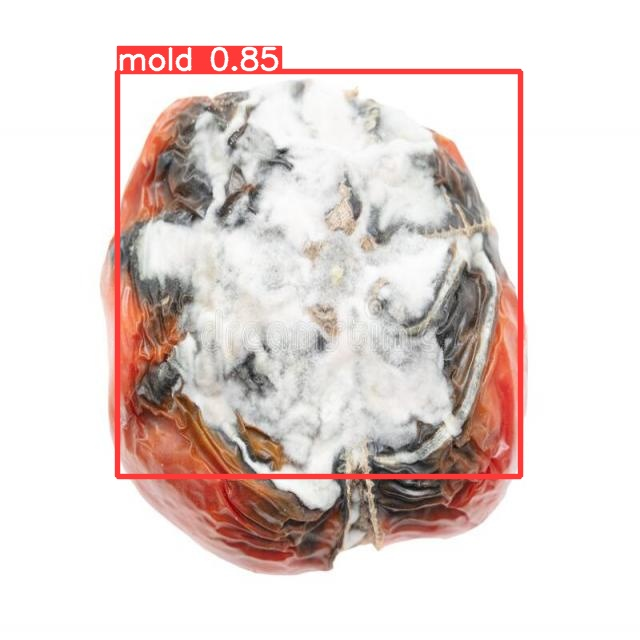

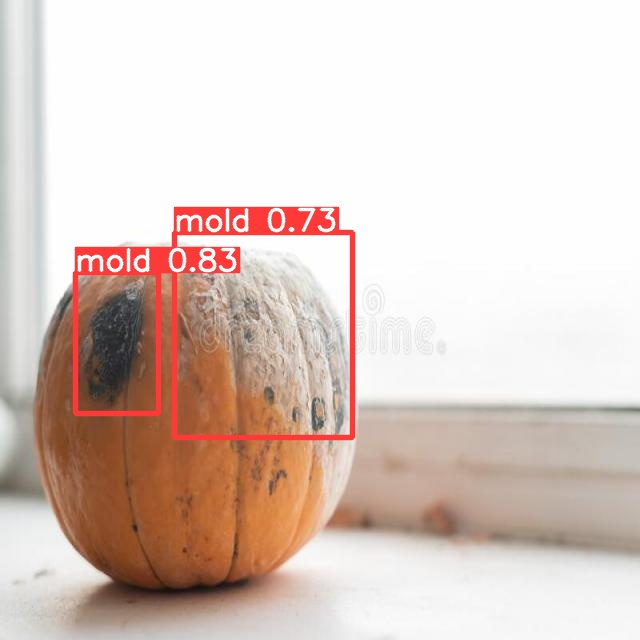

In [ ]:
# Showing last 10 redictions
display_predicted_images(img_path='runs/detect/predict', start=10, number=10)

# More Inferences (Predictions)

In [ ]:
def v8_make_prediction(img_url):
  !yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source={img_url} save=True


def show_image(img_url):
  image = plt.imread(img_url)
  plt.imshow(image)
  plt.axis('off')

In [ ]:
TEST_DATASET_BASE = f'{DATASET_PATH}/test/images'

img1 = '157_jpg.rf.e20d7e29af636be6330a251cbe703cd3.jpg'
img2 = '213_jpg.rf.bc2124088ddf5bf5ddc8b0eced503771.jpg'
img3 = '254_jpg.rf.acca4622444b45c5a5a06969373300b3.jpg'
img4 = '467_jpg.rf.0c4057d42150a3c1ec03198fc894a314.jpg'

img1_uri = f'{TEST_DATASET_BASE}/{img1}'
img2_uri = f'{TEST_DATASET_BASE}/{img2}'
img3_uri = f'{TEST_DATASET_BASE}/{img3}'
img4_uri = f'{TEST_DATASET_BASE}/{img4}'

## Prediction 1

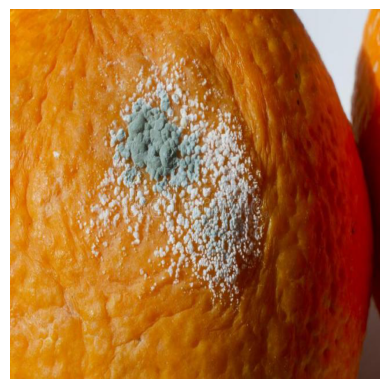

In [ ]:
show_image(img1_uri)

In [ ]:
v8_make_prediction(img_url=img1_uri)

2023-04-20 15:26:49.332633: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 15:26:51.292890: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Olubukola_Mold_Detection_Project/yolov8/datasets/mold-detection-project-2/test/images/157_jpg.rf.e20d7e29af636be6330a251cbe703cd3.jpg: 640x640 2 molds, 885.6ms
Speed: 10.4ms pre-process, 885.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


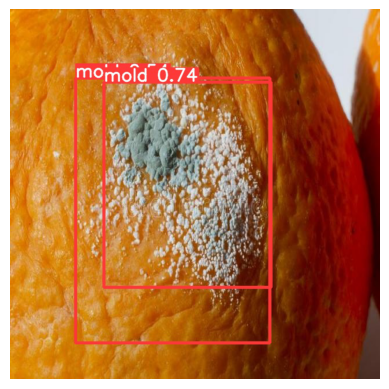

In [ ]:
show_image(img_url=f'runs/detect/predict2/{img1}')

## Prediction 2

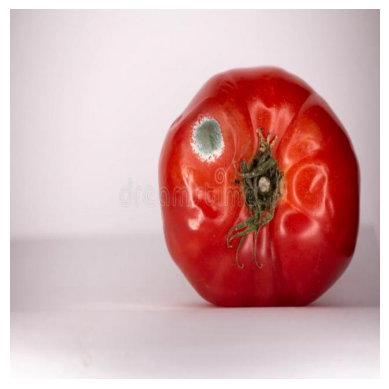

In [ ]:
show_image(img2_uri)

In [ ]:
v8_make_prediction(img_url=img2_uri)

2023-04-20 15:27:32.964081: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 15:27:34.618702: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Olubukola_Mold_Detection_Project/yolov8/datasets/mold-detection-project-2/test/images/213_jpg.rf.bc2124088ddf5bf5ddc8b0eced503771.jpg: 640x640 2 molds, 651.1ms
Speed: 3.6ms pre-process, 651.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


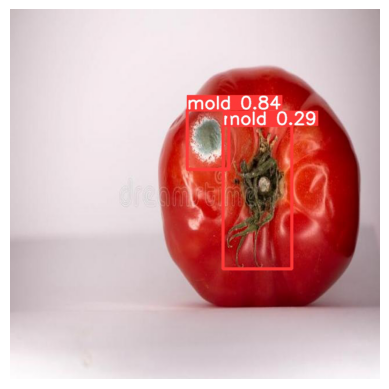

In [ ]:
show_image(img_url=f'runs/detect/predict3/{img2}')

## Prediction 3

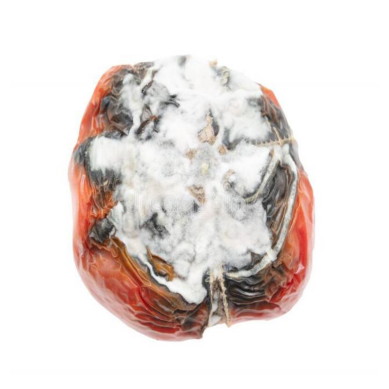

In [ ]:
show_image(img3_uri)

In [ ]:
v8_make_prediction(img_url=img3_uri)

2023-04-20 15:28:13.090498: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 15:28:16.677770: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Olubukola_Mold_Detection_Project/yolov8/datasets/mold-detection-project-2/test/images/254_jpg.rf.acca4622444b45c5a5a06969373300b3.jpg: 640x640 1 mold, 644.7ms
Speed: 3.8ms pre-process, 644.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


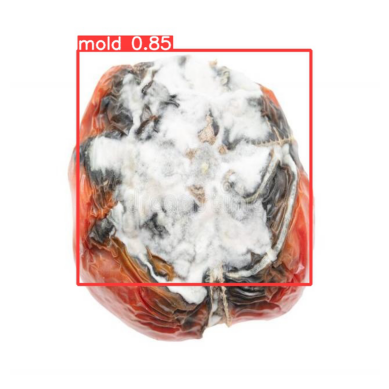

In [ ]:
show_image(img_url=f'runs/detect/predict4/{img3}')

italicised text## Prediction 4

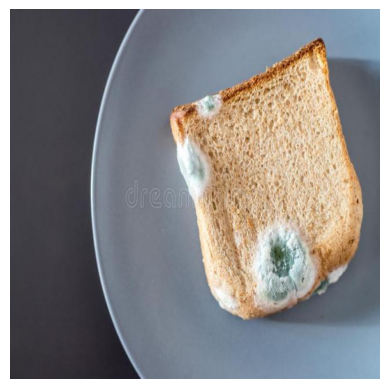

In [ ]:
show_image(img4_uri)

In [ ]:
v8_make_prediction(img_url=img4_uri)

2023-04-20 15:29:36.767346: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 15:29:37.864554: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Olubukola_Mold_Detection_Project/yolov8/datasets/mold-detection-project-2/test/images/467_jpg.rf.0c4057d42150a3c1ec03198fc894a314.jpg: 640x640 4 molds, 761.9ms
Speed: 4.5ms pre-process, 761.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


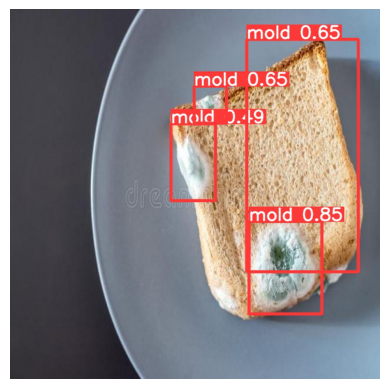

In [ ]:
show_image(img_url=f'runs/detect/predict5/{img4}')

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
# project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
# #Run inference on your model on a persistant, auto-scaling, cloud API

# #load model
# model = project.version(dataset.version).model

# #choose random test set image
# import os, random
# test_set_loc = DATASET_PATH + "/test/images/"
# random_test_image = random.choice(os.listdir(test_set_loc))
# print("running inference on " + random_test_image)

# pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
# pred

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.